In [1]:
from _eval import compute_bleu_at_n, compute_meteor, compute_rouge, compute_cider
from _eval import bleu_metric, meteor_metric, rouge_metric, cider_metric
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ZR7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ZR7\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Define All Metric Functions

## 1- Easy Category

In [2]:
ground_truth_file_path = "./dataset_labels/ec_videos_labels.json"
# Read the JSON file for this Category
with open(ground_truth_file_path, 'r', encoding='utf-8') as file:
    ec_data = json.load(file)

In [3]:
ec_labels_list = [item['Captions'] for item in ec_data]

In [4]:
len(ec_labels_list)

11

In [5]:
ec_labels_list[0]

'This video shows A man with a beard and glasses is shown sitting on a tan couch. He wears a light green, short-sleeved, collared shirt. A green stripe with the name, “Jeffrey LaPratt, PsyD”, is at the lower edge of the frame, partially overlapping the green bottom of his shirt. To the man’s right is a green plant with dark green, oval-shaped, leaves. The wall behind Jeffrey is off-white. The lighting in the room is dim, with shadows along the wall. Jeffrey explains that he will explain a mindfulness exercise that involves observing an everyday object, for example, a pen, pencil, or phone, and looking at it as if it is the first time the observer has ever seen it. Jeffrey refers to this as “beginner’s mind” and the desired effect is “wordless watching.”'

### 1.1 GPT

In [6]:
generated_captions_gpt_path = "./results/GPT/ec_videos_described_gpt.json"
# Read the JSON file for this Category
with open(generated_captions_gpt_path, 'r', encoding='utf-8') as file:
    gpt_data = json.load(file)

In [7]:
ec_gpt_captions_list = [item['summary'] for item in gpt_data]

In [8]:
len(ec_gpt_captions_list)

11

In [9]:
ec_gpt_captions_list[0]

'The video appears to feature a professional presentation by a man named Jeffrey LaPratt, PsyD. He is depicted sitting in a calm and minimalist setting, characterized by a light-colored wall and a small green plant to his right. Dressed in a light green shirt and wearing glasses, he seems engaged in conversation or sharing information, likely related to mental well-being and mindfulness, as suggested by the presence of a QR code and the branding associated with "Mindful Minutes" from Sheppard Pratt.\n\nThe overall aesthetic of the video conveys a sense of professionalism and approachability, with a focus on creating a serene atmosphere conducive to discussions about mental health. The QR code likely serves as a tool for viewers to access additional resources or information related to the topics being discussed. The combination of visual elements and the audio transcription suggests a thoughtful and informative presentation aimed at promoting mindfulness and mental wellness.'

#### 1.1.1 Bleu Metric

In [11]:
# Evaluate GPT using the Bleu metric
gpt_all_scores = bleu_metric('GPT', ec_labels_list, ec_gpt_captions_list)

BLEU@1 Score: 0.007021982585282052
BLEU@2 Score: 0.0047122066519494805
BLEU@3 Score: 0.0032929025779699626
BLEU@4 Score: 0.0023199686929793336


#### 1.1.2 Meteor Metric

In [13]:
# Evaluate GPT using the Meteor metric
gpt_all_scores.extend(meteor_metric('GPT', ec_labels_list, ec_gpt_captions_list))

meteor Score: 0.02668024796228613


#### 1.1.3 Rouge Metric

In [15]:
# Evaluate GPT using the Rouge metric
gpt_all_scores.extend(rouge_metric('GPT', ec_labels_list, ec_gpt_captions_list))

Rouge Score: {'rouge1': 0.37201695401612883, 'rouge2': 0.0840006772655768, 'rougeL': 0.2050559519882979}


#### 1.1.4 Cider Metric

In [17]:
# Evaluate GPT using the Cider metric
gpt_all_scores.extend(cider_metric('GPT', ec_labels_list, ec_gpt_captions_list))

Cider Score: 0.00028162861748089467


In [18]:
gpt_all_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.007021982585282052},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.0047122066519494805},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.0032929025779699626},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.0023199686929793336},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.02668024796228613},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.37201695401612883},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.0840006772655768},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.2050559519882979},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.00028162861748089467}]

### 1.2 Claude

In [19]:
generated_captions_claude_path = "./results/Claude/ec_videos_described_claude.json"
# Read the JSON file for this Category
with open(generated_captions_claude_path, 'r', encoding='utf-8') as file:
    claude_data = json.load(file)

In [20]:
ec_claude_captions_list = [item['summary'] for item in claude_data]

In [21]:
len(ec_claude_captions_list)

11

In [22]:
ec_claude_captions_list[0]

'Based on the video descriptions and audio transcription, here\'s a summary:\n\nThe video appears to be a professional mindfulness presentation by Jeffrey LaPratt, PsyD, as part of the "Mindful Minutes" series by Sheppard Pratt. The video features Dr. LaPratt in a mint green polo shirt, seated in a professional office setting with a houseplant in the background. The presentation focuses on a mindfulness exercise about observational awareness.\n\nThe core of the mindfulness technique involves:\n- Choosing an everyday object (like a pen, pencil, or phone)\n- Observing the object as if seeing it for the very first time\n- Practicing "beginner\'s mind" and "wordless watching"\n\nThe video is professionally produced, with a consistent visual style that includes a QR code for additional information and a green-themed graphic design. The purpose seems to be to provide accessible, practical mindfulness techniques that can be easily practiced by viewers.\n\nThe accompanying QR code and branding

#### 1.2.1 Bleu Metric

In [23]:
# Evaluate Claude using the Bleu metric
claude_all_scores = bleu_metric('Claude', ec_labels_list, ec_claude_captions_list)

BLEU@1 Score: 0.009083249214809989
BLEU@2 Score: 0.004707164311981639
BLEU@3 Score: 0.003025267436301064
BLEU@4 Score: 0.0020446344350642316


#### 1.2.2 Meteor Metric

In [24]:
# Evaluate Claude using the Meteor metric
claude_all_scores.extend(meteor_metric('Claude', ec_labels_list, ec_claude_captions_list))

meteor Score: 0.020840055033872786


#### 1.2.3 Rouge Metric

In [25]:
# Evaluate Claude using the Rouge metric
claude_all_scores.extend(rouge_metric('Claude', ec_labels_list, ec_claude_captions_list))

Rouge Score: {'rouge1': 0.39890567930402004, 'rouge2': 0.09678069752513109, 'rougeL': 0.19309180214385616}


#### 1.2.4 Cider Metric

In [26]:
# Evaluate Claude using the Cider metric
claude_all_scores.extend(cider_metric('Claude', ec_labels_list, ec_claude_captions_list))

Cider Score: 0.01891037839854798


In [27]:
claude_all_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.009083249214809989},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.004707164311981639},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.003025267436301064},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.0020446344350642316},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.020840055033872786},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.39890567930402004},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.09678069752513109},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.19309180214385616},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 0.01891037839854798}]

### 1.3 Gemini

In [28]:
generated_captions_gemini_path = "./results/Gemini/ec_videos_described_gemini.json"
# Read the JSON file for this Category
with open(generated_captions_gemini_path, 'r', encoding='utf-8') as file:
    gemini_data = json.load(file)

In [29]:
ec_gemini_captions_list = [item['summary'] for item in gemini_data]

In [30]:
len(ec_gemini_captions_list)

11

In [31]:
ec_gemini_captions_list[0]

'This video is a mindfulness exercise led by Jeffrey LaPratt, PsyD, a Sheppard Pratt affiliated professional.  The video features a series of screens displaying the Mindful Minutes logo (featuring a stylized "M" and stacked stones), along with QR codes linking to further information.  The main portion of the video shows Dr. LaPratt in a medium to close-up shot, seated in what appears to be an office or waiting room setting.  He speaks directly to the camera, explaining a mindfulness technique involving observing an everyday object with a "beginner\'s mind," focusing on wordless observation.  Throughout the video, a QR code is consistently visible in the lower left corner of the screen, and a green banner with Dr. LaPratt\'s name and credentials is displayed at the bottom.  The overall tone is calm, professional, and instructional.\n'

#### 1.3.1 Bleu Metric

In [32]:
# Evaluate Gemini using the Bleu metric
gemini_all_scores = bleu_metric('Gemini', ec_labels_list, ec_gemini_captions_list)

BLEU@1 Score: 0.007463970731765384
BLEU@2 Score: 0.004890044597064009
BLEU@3 Score: 0.003393795343087365
BLEU@4 Score: 0.0023833758707707455


#### 1.3.2 Meteor Metric

In [33]:
# Evaluate Gemini using the Meteor metric
gemini_all_scores.extend(meteor_metric('Gemini', ec_labels_list, ec_gemini_captions_list))

meteor Score: 0.026707664298836607


#### 1.3.3 Rouge Metric

In [34]:
# Evaluate Gemini using the Rouge metric
gemini_all_scores.extend(rouge_metric('Gemini', ec_labels_list, ec_gemini_captions_list))

Rouge Score: {'rouge1': 0.4209065545446082, 'rouge2': 0.12771808940053006, 'rougeL': 0.22213016358288218}


#### 1.3.4 Cider Metric

In [35]:
# Evaluate Gemini using the Cider metric
gemini_all_scores.extend(cider_metric('Gemini', ec_labels_list, ec_gemini_captions_list))

Cider Score: 0.045081192842570166


In [36]:
gemini_all_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.007463970731765384},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.004890044597064009},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.003393795343087365},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.0023833758707707455},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.026707664298836607},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.4209065545446082},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.12771808940053006},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.22213016358288218},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 0.045081192842570166}]

## Display the results with a pandas' table

In [2]:
# Function to convert model metrics to row format
def format_model_data(data_list):
    result = {}
    for item in data_list:
        metric = item['Metric_name']
        if metric.lower() == 'rouge1':
            metric = 'Rouge1'
        elif metric.lower() == 'rouge2':
            metric = 'Rouge2'
        elif metric.lower() == 'rougel':
            metric = 'RougeL'
        result[metric] = item['Score']
    return result

In [3]:
# Set pandas display options to show the full width
pd.set_option('display.width', None)  # No width limit
pd.set_option('display.max_columns', None)  # Show all columns

In [4]:
def draw_table(gpt_scores, claude_scores, gemini_scores):
    # Create empty DataFrame with desired structure
    metrics = ['Blue@1', 'Blue@2', 'Blue@3', 'Blue@4', 'Meteor', 'Rouge1', 'Rouge2', 'RougeL', 'Cider']
    df = pd.DataFrame(index=['GPT', 'Claude', 'Gemini'], columns=metrics)
    
    # Fill in GPT Scores
    gpt_row = format_model_data(gpt_scores)
    for metric, score in gpt_row.items():
        if metric.startswith('BLEU'):
            column = metric.replace('BLEU', 'Blue')
        else:
            column = metric
        df.at['GPT', column] = score
    
    # Fill in Claude Scores
    claude_row = format_model_data(claude_scores)
    for metric, score in claude_row.items():
        if metric.startswith('BLEU'):
            column = metric.replace('BLEU', 'Blue')
        else:
            column = metric
        df.at['Claude', column] = score
    
    # Fill in Gemini Scores
    gemini_row = format_model_data(gemini_scores)
    for metric, score in gemini_row.items():
        if metric.startswith('BLEU'):
            column = metric.replace('BLEU', 'Blue')
        else:
            column = metric
        df.at['Gemini', column] = score
    
    # Format the dataframe for better display
    df = df.map(lambda x: f"{x:.4f}" if isinstance(x, float) else x)

    return df

In [40]:
df = draw_table(gpt_all_scores, claude_all_scores, gemini_all_scores)
# Display the table
print(df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0070  0.0047  0.0033  0.0023  0.0267  0.3720  0.0840  0.2051  0.0003
Claude  0.0091  0.0047  0.0030  0.0020  0.0208  0.3989  0.0968  0.1931  0.0189
Gemini  0.0075  0.0049  0.0034  0.0024  0.0267  0.4209  0.1277  0.2221  0.0451


In [5]:
def save_df_to_csv(dataFrame, file_name, title):
    # Save as Excel with styling (requires openpyxl)
    dataFrame.to_excel(file_name + '.xlsx', engine='openpyxl')    
    
    # Create figure and axis objects correctly
    fig = plt.figure(figsize=(10, 3))
    ax = plt.subplot(111, frame_on=False)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Hide axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    # Create table
    table(ax, dataFrame.round(4), loc='center')
    
    # Save figure
    plt.savefig(file_name + '.png', dpi=300, bbox_inches='tight')

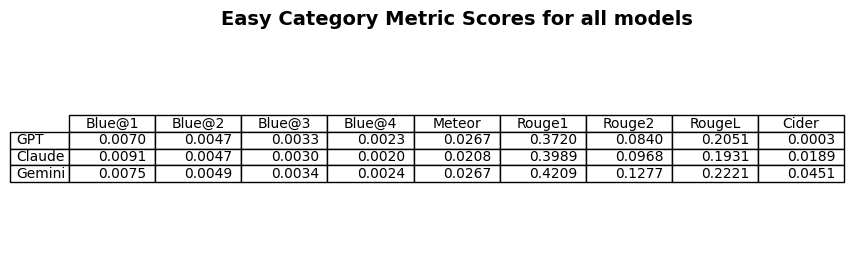

In [46]:
save_df_to_csv(df, 'ec_model_metrics_table', 'Easy Category Metric Scores for all models')

In [5]:
# Load the data from Excel file
df = pd.read_excel('ec_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
df = df.set_index(df.columns[0])

In [6]:
# Bar Chart - comparing models across all benchmarks
def bar_graph(data, title="Model Performance Across All Benchmarks", image_name="ec_model_metrics_comparison_bar_charts"):
    # Create a figure with multiple subplots
    fig, ax = plt.subplots(figsize=(8, 6))
    data.T.plot(kind='bar', ax=ax)
    # ax.set_title(title, fontsize=16)
    ax.set_xlabel('Benchmarks', fontsize=14)
    ax.set_ylabel('Score', fontsize=14)
    ax.legend(title='Models')
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(image_name + '.png', dpi=300)
    plt.show()

# Line Chart - comparing models across benchmarks
def line_graph(data, title="Model Performance Trends Across Benchmarks", image_name="ec_model_metrics_comparison_line_charts"):
    # Create a figure with multiple subplots
    fig, ax = plt.subplots(figsize=(8, 6))
    data.T.plot(kind='line', marker='o', ax=ax)
    # ax.set_title(title, fontsize=16)
    ax.set_xlabel('Benchmarks', fontsize=14)
    ax.set_ylabel('Score', fontsize=14)
    ax.legend(title='Models')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(image_name + '.png', dpi=300)
    plt.show()

# Create a heatmap visualization for better comparison
def heatmap_graph(data, title="Model Performance Heatmap", image_name="ec_model_metrics_comparison_heatmap"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, cmap='YlGnBu', fmt='.4f', linewidths=.5)
    # plt.title(title, fontsize=16)
    plt.savefig(image_name + '.png', dpi=300)
    plt.show()

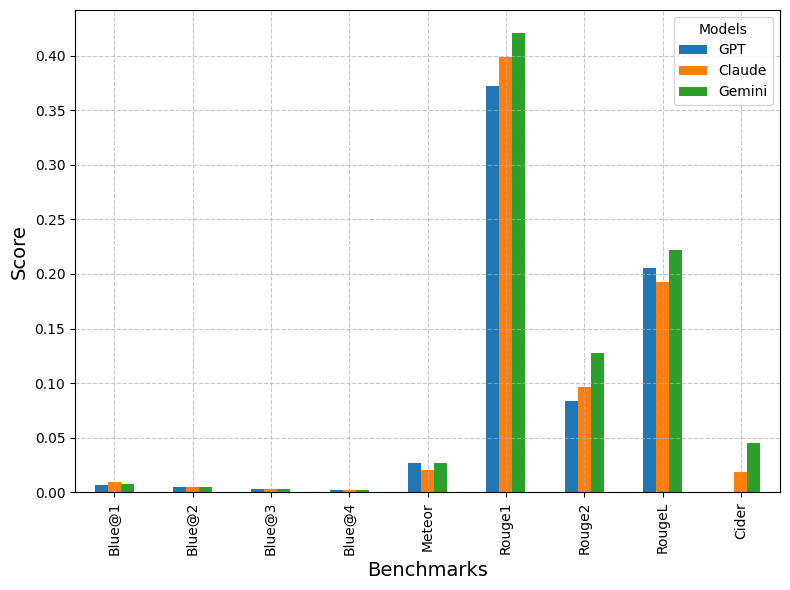

In [7]:
bar_graph(data=df, title="Model Performance Trends Across Benchmarks For Easy Categories", image_name="ec_model_metrics_comparison_bar_charts")

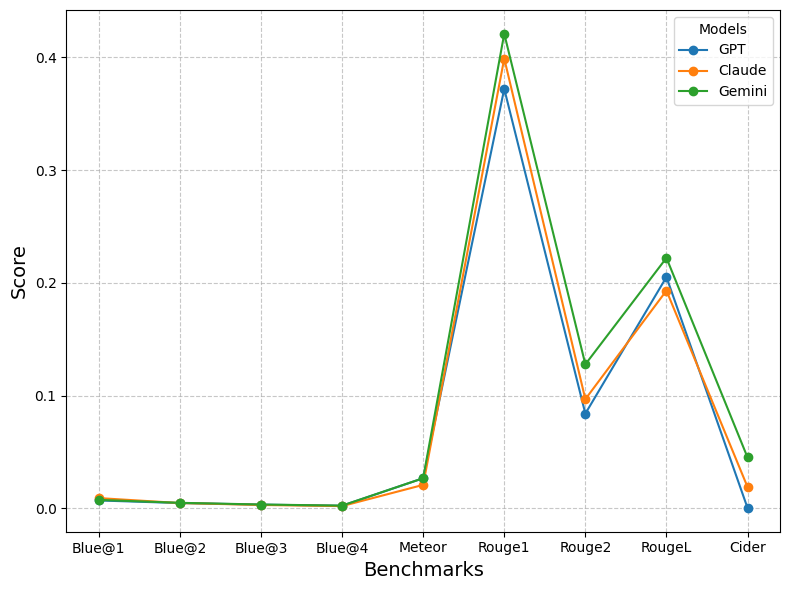

In [8]:
line_graph(data=df, title="Model Performance Trends Across Benchmarks For Easy Categories", image_name="ec_model_metrics_comparison_line_charts")

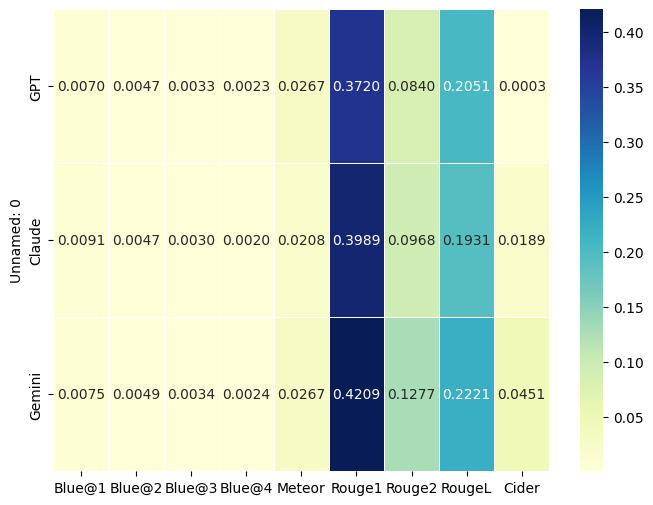

In [9]:
heatmap_graph(data=df, title="Model Performance Heatmap For Easy Categories", image_name="ec_model_metrics_comparison_heatmap")

## 2- Medium Category

In [8]:
ground_truth_file_path = "./dataset_labels/mc_videos_labels.json"
# Read the JSON file for this Category
with open(ground_truth_file_path, 'r', encoding='utf-8') as file:
    mc_data = json.load(file)

In [9]:
mc_labels_list = [item['Captions'] for item in mc_data]
mc_mi_labels_list = [item['Captions'] for item in mc_data if item['sub_category'] == "Moderate_interactions"]
mc_mos_labels_list = [item['Captions'] for item in mc_data if item['sub_category'] == "Multiple_objects_or_subjects"]

In [10]:
print(f"All Categories Captions : {len(mc_labels_list)} items")
print(f"Moderate Interactions Category's Captions : {len(mc_mi_labels_list)} items")
print(f"Multiple Objects or Subjects Category's Captions : {len(mc_mos_labels_list)} items")

All Categories Captions : 15 items
Moderate Interactions Category's Captions : 3 items
Multiple Objects or Subjects Category's Captions : 12 items


In [11]:
mc_labels_list[0]

'The scene begins with Mia and Sebastian walking toward the camera, side by side, across the overlook’s paved area. Once they reach the edge of the overlook, they stop and gaze out at the twinkling city lights below. They turn to face each other and begin tap-dancing. They dance near a bench, and then run down the paved road toward a lone streetlamp. They continue dancing beneath the streetlamp, then dance their way into a clearing near a tree where they twirl, kick their legs high, and incorporate other playful movements into their routine. As they dance, the sun sinks lower and lower in the sky. The dance ends with a kiss, and then the couple dances again, now running across the clearing toward the city view. They dance their way back to the bench where they started, their movements becoming slower and more romantic, mirroring the increasingly dim light. The music ends and Mia gets a phone call. It’s Greg, her boyfriend. Mia tells Greg she will be there soon, then hangs up. Sebastian

### 2.1 GPT

In [12]:
generated_captions_gpt_path = "./results/GPT/mc_videos_described_gpt.json"
# Read the JSON file for this Category
with open(generated_captions_gpt_path, 'r', encoding='utf-8') as file:
    gpt_data = json.load(file)

In [13]:
mc_gpt_captions_list = [item['summary'] for item in gpt_data]
mc_mi_gpt_captions_list = [item['summary'] for item in gpt_data if item['sub_category'] == "Moderate_interactions"]
mc_mos_gpt_captions_list = [item['summary'] for item in gpt_data if item['sub_category'] == "Multiple_objects_or_subjects"]

In [14]:
print(f"All Categories Captions : {len(mc_gpt_captions_list)} items")
print(f"Moderate Interactions Category's Captions : {len(mc_mi_gpt_captions_list)} items")
print(f"Multiple Objects or Subjects Category's Captions : {len(mc_mos_gpt_captions_list)} items")

All Categories Captions : 15 items
Moderate Interactions Category's Captions : 3 items
Multiple Objects or Subjects Category's Captions : 12 items


In [15]:
mc_gpt_captions_list[0]

'The video captures a series of romantic and joyful moments between two individuals during twilight, set against a stunning backdrop of a sprawling city illuminated by twinkling lights. The sky transitions through a beautiful gradient of colors, from deep blues to warm oranges and purples, indicating the time of sunset. \n\nThe two figures, a man in a white shirt and dark pants and a woman in a vibrant yellow dress, are often seen walking, spinning, or standing together, showcasing their connection and playful interaction. The scenes convey a sense of intimacy and tranquility, enhanced by the silhouettes of trees and distant mountains framing the picturesque landscape. \n\nOverall, the atmosphere is serene and enchanting, capturing the beauty of the moment as the couple enjoys their time together, reflecting on the breathtaking view and the joy of their shared experience.'

#### 2.1.1 Bleu Metric

In [16]:
# Evaluate GPT using the Bleu metric
gpt_all_scores = bleu_metric('GPT', mc_labels_list, mc_gpt_captions_list)
print("************************************")
gpt_mi_scores = bleu_metric('GPT', mc_mi_labels_list, mc_mi_gpt_captions_list)
print("************************************")
gpt_mos_scores = bleu_metric('GPT', mc_mos_labels_list, mc_mos_gpt_captions_list)

BLEU@1 Score: 0.005779665707755466
BLEU@2 Score: 0.003965860907983039
BLEU@3 Score: 0.00278749540465928
BLEU@4 Score: 0.0019686311915626383
************************************
BLEU@1 Score: 0.00598062327792864
BLEU@2 Score: 0.004241929530107626
BLEU@3 Score: 0.0030087503869530604
BLEU@4 Score: 0.002134099348658363
************************************
BLEU@1 Score: 0.005729426315212172
BLEU@2 Score: 0.0038968437524518917
BLEU@3 Score: 0.0027321816590858347
BLEU@4 Score: 0.0019272641522887067


#### 2.1.2 Meteor Metric

In [17]:
# Evaluate GPT using the Meteor metric
gpt_all_scores.extend(meteor_metric('GPT', mc_labels_list, mc_gpt_captions_list))
print("************************************")
gpt_mi_scores.extend(meteor_metric('GPT', mc_mi_labels_list, mc_mi_gpt_captions_list))
print("************************************")
gpt_mos_scores.extend(meteor_metric('GPT', mc_mos_labels_list, mc_mos_gpt_captions_list))

meteor Score: 0.022867773506368195
************************************
meteor Score: 0.025211587263237193
************************************
meteor Score: 0.022281820067150942


#### 2.1.3 Rouge Metric

In [18]:
# Evaluate GPT using the Rouge metric
gpt_all_scores.extend(rouge_metric('GPT', mc_labels_list, mc_gpt_captions_list))
print("************************************")
gpt_mi_scores.extend(rouge_metric('GPT', mc_mi_labels_list, mc_mi_gpt_captions_list))
print("************************************")
gpt_mos_scores.extend(rouge_metric('GPT', mc_mos_labels_list, mc_mos_gpt_captions_list))

Rouge Score: {'rouge1': 0.3022283126085583, 'rouge2': 0.046202811260489106, 'rougeL': 0.17091657717445602}
************************************
Rouge Score: {'rouge1': 0.3017825078358804, 'rouge2': 0.04094279956348922, 'rougeL': 0.1764444118388621}
************************************
Rouge Score: {'rouge1': 0.3023397638017278, 'rouge2': 0.04751781418473908, 'rougeL': 0.1695346185083545}


#### 2.1.4 Cider Metric

In [19]:
# Evaluate GPT using the Cider metric
gpt_all_scores.extend(cider_metric('GPT', mc_labels_list, mc_gpt_captions_list))
print("************************************")
gpt_mi_scores.extend(cider_metric('GPT', mc_mi_labels_list, mc_mi_gpt_captions_list))
print("************************************")
gpt_mos_scores.extend(cider_metric('GPT', mc_mos_labels_list, mc_mos_gpt_captions_list))

Cider Score: 0.008721657609373778
************************************
Cider Score: 0.06180228773015909
************************************
Cider Score: 0.000716418700073069


In [20]:
gpt_all_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.005779665707755466},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.003965860907983039},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.00278749540465928},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.0019686311915626383},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.022867773506368195},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.3022283126085583},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.046202811260489106},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.17091657717445602},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.008721657609373778}]

In [21]:
gpt_mi_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.00598062327792864},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.004241929530107626},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.0030087503869530604},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.002134099348658363},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.025211587263237193},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.3017825078358804},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.04094279956348922},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.1764444118388621},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.06180228773015909}]

In [22]:
gpt_mos_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.005729426315212172},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.0038968437524518917},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.0027321816590858347},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.0019272641522887067},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.022281820067150942},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.3023397638017278},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.04751781418473908},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.1695346185083545},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.000716418700073069}]

### 2.2 Claude

In [23]:
generated_captions_claude_path = "./results/Claude/mc_videos_described_claude.json"
# Read the JSON file for this Category
with open(generated_captions_claude_path, 'r', encoding='utf-8') as file:
    claude_data = json.load(file)

In [24]:
mc_claude_captions_list = [item['summary'] for item in claude_data]
mc_mi_claude_captions_list = [item['summary'] for item in claude_data if item['sub_category'] == "Moderate_interactions"]
mc_mos_claude_captions_list = [item['summary'] for item in claude_data if item['sub_category'] == "Multiple_objects_or_subjects"]

In [25]:
print(f"All Categories Captions : {len(mc_claude_captions_list)} items")
print(f"Moderate Interactions Category's Captions : {len(mc_mi_claude_captions_list)} items")
print(f"Multiple Objects or Subjects Category's Captions : {len(mc_mos_claude_captions_list)} items")

All Categories Captions : 15 items
Moderate Interactions Category's Captions : 3 items
Multiple Objects or Subjects Category's Captions : 12 items


In [26]:
mc_claude_captions_list[0]

'Based on the detailed scene descriptions and the singular audio transcription of "glue," here\'s a summary of the video:\n\nSummary of the Scene:\nThis is an iconic scene from the movie "La La Land" featuring the main characters dancing on a hilltop overlooking Los Angeles at twilight. The scene captures a romantic, dreamlike moment with stunning visual elements:\n\n- Location: A scenic overlook or hilltop with a panoramic view of Los Angeles\n- Time of Day: Twilight/dusk, with a transitioning sky of purple and orange sunset colors\n- Characters:\n  - A woman wearing a vibrant, flowing yellow dress\n  - A man dressed formally in a white shirt, tie, and dark pants\n- Background: Twinkling city lights spread across the valley, with some bare tree branches framing the scene\n\nThe scene embodies the film\'s characteristic romantic and visually poetic style, typical of classic Hollywood musicals. The couple appears to be dancing or moving together, with the cityscape and dramatic sky serv

#### 2.2.1 Bleu Metric

In [27]:
# Evaluate Claude using the Bleu metric
claude_all_scores = bleu_metric('Claude', mc_labels_list, mc_claude_captions_list)
print("************************************")
claude_mi_scores = bleu_metric('Claude', mc_mi_labels_list, mc_mi_claude_captions_list)
print("************************************")
claude_mos_scores = bleu_metric('Claude', mc_mos_labels_list, mc_mos_claude_captions_list)

BLEU@1 Score: 0.006487498320944222
BLEU@2 Score: 0.003929018174230937
BLEU@3 Score: 0.0026673731485866025
BLEU@4 Score: 0.0018533440837079087
************************************
BLEU@1 Score: 0.009268026459410052
BLEU@2 Score: 0.00451884222125679
BLEU@3 Score: 0.0028563175657850565
BLEU@4 Score: 0.001915769649398853
************************************
BLEU@1 Score: 0.005792366286327761
BLEU@2 Score: 0.0037815621624744736
BLEU@3 Score: 0.0026201370442869893
BLEU@4 Score: 0.0018377376922851726


#### 2.2.2 Meteor Metric

In [28]:
# Evaluate Claude using the Meteor metric
claude_all_scores.extend(meteor_metric('Claude', mc_labels_list, mc_claude_captions_list))
print("************************************")
claude_mi_scores.extend(meteor_metric('Claude', mc_mi_labels_list, mc_mi_claude_captions_list))
print("************************************")
claude_mos_scores.extend(meteor_metric('Claude', mc_mos_labels_list, mc_mos_claude_captions_list))

meteor Score: 0.020308433528283914
************************************
meteor Score: 0.019371994737650635
************************************
meteor Score: 0.020542543225942234


#### 2.2.3 Rouge Metric

In [29]:
# Evaluate Claude using the Rouge metric
claude_all_scores.extend(rouge_metric('Claude', mc_labels_list, mc_claude_captions_list))
print("************************************")
claude_mi_scores.extend(rouge_metric('Claude', mc_mi_labels_list, mc_mi_claude_captions_list))
print("************************************")
claude_mos_scores.extend(rouge_metric('Claude', mc_mos_labels_list, mc_mos_claude_captions_list))

Rouge Score: {'rouge1': 0.34849791478698344, 'rouge2': 0.08579187929889452, 'rougeL': 0.20071974438380308}
************************************
Rouge Score: {'rouge1': 0.2918111787677005, 'rouge2': 0.05698878513752036, 'rougeL': 0.16592007026789635}
************************************
Rouge Score: {'rouge1': 0.3626695987918042, 'rouge2': 0.09299265283923806, 'rougeL': 0.20941966291277983}


#### 2.2.4 Cider Metric

In [30]:
# Evaluate Claude using the Cider metric
claude_all_scores.extend(cider_metric('Claude', mc_labels_list, mc_claude_captions_list))
print("************************************")
claude_mi_scores.extend(cider_metric('Claude', mc_mi_labels_list, mc_mi_claude_captions_list))
print("************************************")
claude_mos_scores.extend(cider_metric('Claude', mc_mos_labels_list, mc_mos_claude_captions_list))

Cider Score: 0.09872015486895913
************************************
Cider Score: 0.032451217901077245
************************************
Cider Score: 0.11268270222913469


In [31]:
claude_all_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.006487498320944222},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.003929018174230937},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.0026673731485866025},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.0018533440837079087},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.020308433528283914},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.34849791478698344},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.08579187929889452},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.20071974438380308},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 0.09872015486895913}]

In [32]:
claude_mi_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.009268026459410052},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.00451884222125679},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.0028563175657850565},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.001915769649398853},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.019371994737650635},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.2918111787677005},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.05698878513752036},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.16592007026789635},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 0.032451217901077245}]

In [33]:
claude_mos_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.005792366286327761},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.0037815621624744736},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.0026201370442869893},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.0018377376922851726},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.020542543225942234},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.3626695987918042},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.09299265283923806},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.20941966291277983},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 0.11268270222913469}]

### 2.3 Gemini

In [35]:
generated_captions_gemini_path = "./results/Gemini/mc_videos_described_gemini.json"
# Read the JSON file for this Category
with open(generated_captions_gemini_path, 'r', encoding='utf-8') as file:
    gemini_data = json.load(file)

In [36]:
mc_gemini_captions_list = [item['summary'] for item in gemini_data]
mc_mi_gemini_captions_list = [item['summary'] for item in gemini_data if item['sub_category'] == "Moderate_interactions"]
mc_mos_gemini_captions_list = [item['summary'] for item in gemini_data if item['sub_category'] == "Multiple_objects_or_subjects"]

In [37]:
print(f"All Categories Captions : {len(mc_gemini_captions_list)} items")
print(f"Moderate Interactions Category's Captions : {len(mc_mi_gemini_captions_list)} items")
print(f"Multiple Objects or Subjects Category's Captions : {len(mc_mos_gemini_captions_list)} items")

All Categories Captions : 15 items
Moderate Interactions Category's Captions : 3 items
Multiple Objects or Subjects Category's Captions : 12 items


In [38]:
mc_gemini_captions_list[0]

'The video is a romantic drama, likely from EgyBest, featuring Ryan Gosling and Emma Stone.  The scene unfolds at twilight on a hilltop overlooking a sprawling city.  The couple, dressed in a white shirt and dark trousers (Gosling) and a bright yellow dress (Stone), are shown running, walking, and standing, sometimes facing each other, sometimes with their backs to the camera, taking in the panoramic city view below.  The scene emphasizes the vastness of the city and the couple’s intimate connection against this dramatic backdrop of twinkling lights, a deep purple and orange sunset sky, and silhouetted trees. The mood is consistently romantic but also subtly melancholic, hinting at a poignant moment or perhaps a farewell.  The couple\'s movements suggest both excitement and a quiet contemplation of their relationship.  A red handbag and a bench are briefly visible in some scenes. The audio consists only of the word "один" (one) in Russian.\n'

#### 2.3.1 Bleu Metric

In [39]:
# Evaluate Gemini using the Bleu metric
gemini_all_scores = bleu_metric('Gemini', mc_labels_list, mc_gemini_captions_list)
print("************************************")
gemini_mi_scores = bleu_metric('Gemini', mc_mi_labels_list, mc_mi_gemini_captions_list)
print("************************************")
gemini_mos_scores = bleu_metric('Gemini', mc_mos_labels_list, mc_mos_gemini_captions_list)

BLEU@1 Score: 0.005907029677952415
BLEU@2 Score: 0.00400695104540526
BLEU@3 Score: 0.0028076308600077237
BLEU@4 Score: 0.0019800861841907636
************************************
BLEU@1 Score: 0.008293152080255476
BLEU@2 Score: 0.004971180342419369
BLEU@3 Score: 0.00335582075696394
BLEU@4 Score: 0.0023249600116821575
************************************
BLEU@1 Score: 0.005310499077376647
BLEU@2 Score: 0.0037658937211517327
BLEU@3 Score: 0.0026705833857686694
BLEU@4 Score: 0.0018938677273179153


#### 2.3.2 Meteor Metric

In [40]:
# Evaluate Gemini using the Meteor metric
gemini_all_scores.extend(meteor_metric('Gemini', mc_labels_list, mc_gemini_captions_list))
print("************************************")
gemini_mi_scores.extend(meteor_metric('Gemini', mc_mi_labels_list, mc_mi_gemini_captions_list))
print("************************************")
gemini_mos_scores.extend(meteor_metric('Gemini', mc_mos_labels_list, mc_mos_gemini_captions_list))

meteor Score: 0.022047381101450693
************************************
meteor Score: 0.024786052381026307
************************************
meteor Score: 0.021362713281556794


#### 2.3.3 Rouge Metric

In [41]:
# Evaluate Gemini using the Rouge metric
gemini_all_scores.extend(rouge_metric('Gemini', mc_labels_list, mc_gemini_captions_list))
print("************************************")
gemini_mi_scores.extend(rouge_metric('Gemini', mc_mi_labels_list, mc_mi_gemini_captions_list))
print("************************************")
gemini_mos_scores.extend(rouge_metric('Gemini', mc_mos_labels_list, mc_mos_gemini_captions_list))

Rouge Score: {'rouge1': 0.3156941165050963, 'rouge2': 0.05747390166321795, 'rougeL': 0.17192331708295364}
************************************
Rouge Score: {'rouge1': 0.3369151169028786, 'rouge2': 0.058110420562776405, 'rougeL': 0.18163292376343806}
************************************
Rouge Score: {'rouge1': 0.31038886640565083, 'rouge2': 0.05731477193832834, 'rougeL': 0.16949591541283252}


#### 2.3.4 Cider Metric

In [42]:
# Evaluate Gemini using the Cider metric
gemini_all_scores.extend(cider_metric('Gemini', mc_labels_list, mc_gemini_captions_list))
print("************************************")
gemini_mi_scores.extend(cider_metric('Gemini', mc_mi_labels_list, mc_mi_gemini_captions_list))
print("************************************")
gemini_mos_scores.extend(cider_metric('Gemini', mc_mos_labels_list, mc_mos_gemini_captions_list))

Cider Score: 0.006000489320522191
************************************
Cider Score: 2.88951124689253e-06
************************************
Cider Score: 0.007038774530141939


In [43]:
gemini_all_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.005907029677952415},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.00400695104540526},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.0028076308600077237},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.0019800861841907636},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.022047381101450693},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.3156941165050963},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.05747390166321795},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.17192331708295364},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 0.006000489320522191}]

In [44]:
gemini_mi_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.008293152080255476},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.004971180342419369},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.00335582075696394},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.0023249600116821575},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.024786052381026307},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.3369151169028786},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.058110420562776405},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.18163292376343806},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 2.88951124689253e-06}]

In [45]:
gemini_mos_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.005310499077376647},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.0037658937211517327},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.0026705833857686694},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.0018938677273179153},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.021362713281556794},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.31038886640565083},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.05731477193832834},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.16949591541283252},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 0.007038774530141939}]

## Display the results with a pandas' table

In [46]:
df = draw_table(gpt_all_scores, claude_all_scores, gemini_all_scores)
# Display the table
print(df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0058  0.0040  0.0028  0.0020  0.0229  0.3022  0.0462  0.1709  0.0087
Claude  0.0065  0.0039  0.0027  0.0019  0.0203  0.3485  0.0858  0.2007  0.0987
Gemini  0.0059  0.0040  0.0028  0.0020  0.0220  0.3157  0.0575  0.1719  0.0060


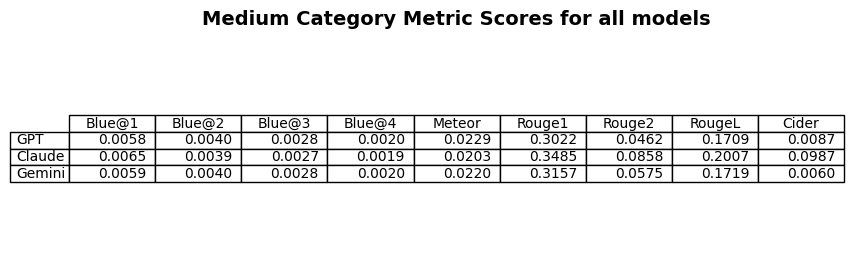

In [47]:
save_df_to_csv(df, 'mc_model_metrics_table', 'Medium Category Metric Scores for all models')

In [10]:
# Load the data from Excel file
df = pd.read_excel('mc_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
df = df.set_index(df.columns[0])

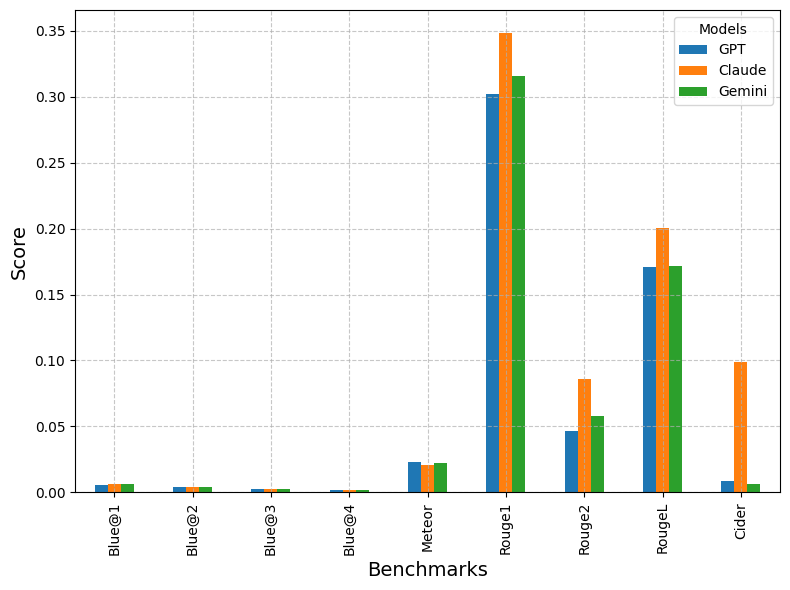

In [11]:
bar_graph(data=df, title="Model Performance Across All Benchmarks For Medium Categories", image_name="mc_model_metrics_comparison_bar_charts")

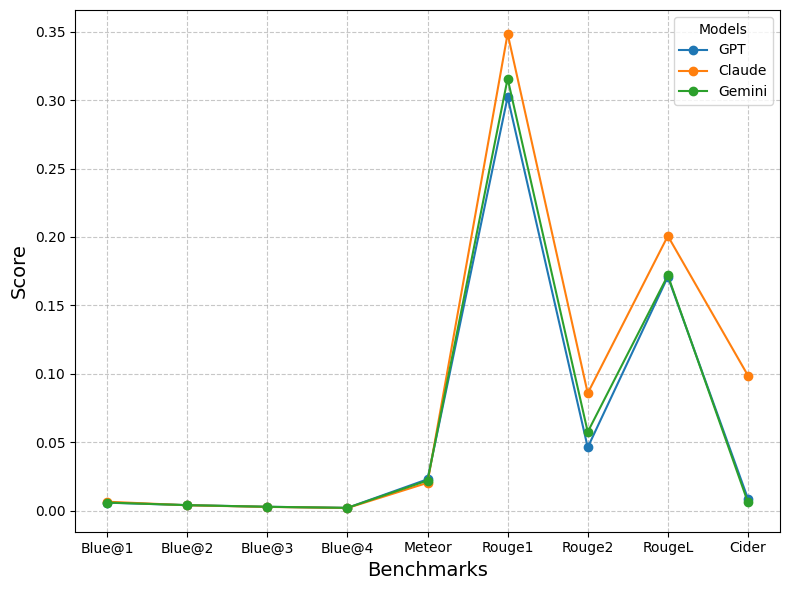

In [12]:
line_graph(data=df, title="Model Performance Across All Benchmarks For Medium Categories", image_name="mc_model_metrics_comparison_line_charts")

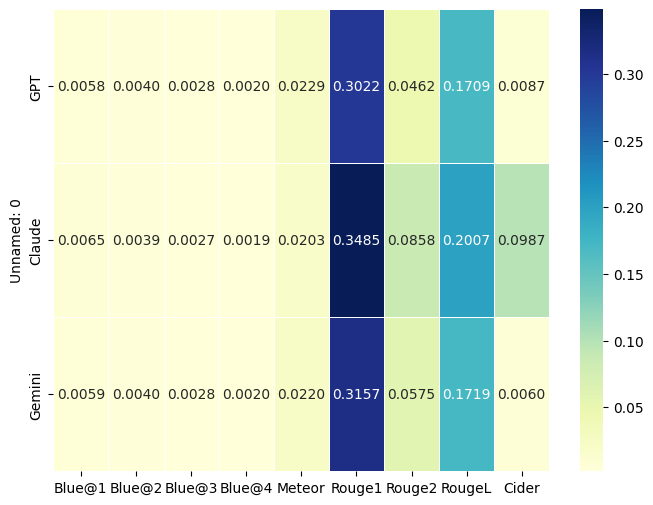

In [13]:
heatmap_graph(data=df, title="Model Performance Heatmap For Medium Categories", image_name="mc_model_metrics_comparison_heatmap")

In [152]:
mi_df = draw_table(gpt_mi_scores, claude_mi_scores, gemini_mi_scores)
# Display the table
print(mi_df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0060  0.0042  0.0030  0.0021  0.0252  0.3018  0.0409  0.1764  0.0618
Claude  0.0093  0.0045  0.0029  0.0019  0.0194  0.2918  0.0570  0.1659  0.0325
Gemini  0.0083  0.0050  0.0034  0.0023  0.0248  0.3369  0.0581  0.1816  0.0000


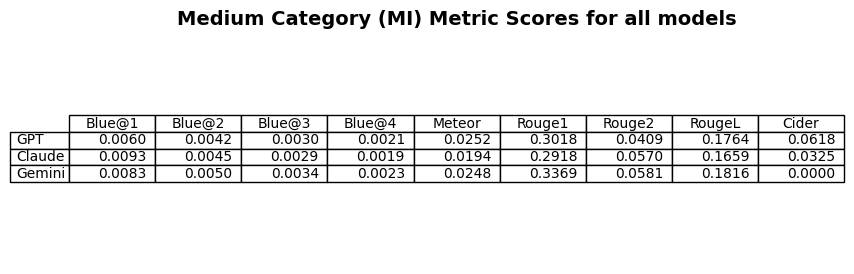

In [54]:
save_df_to_csv(mi_df, 'mc_mi_model_metrics_table', 'Medium Category (MI) Metric Scores for all models')

In [14]:
# Load the data from Excel file
mi_df = pd.read_excel('mc_mi_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
mi_df = mi_df.set_index(mi_df.columns[0])

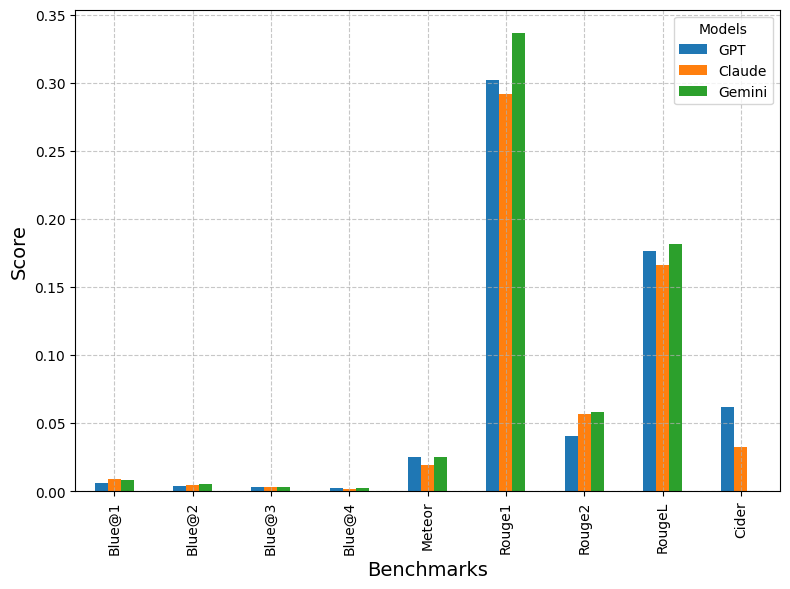

In [15]:
bar_graph(data=mi_df, title="Model Performance Across All Benchmarks For the Medium Category MI", image_name="mc_mi_model_metrics_comparison_bar_charts")

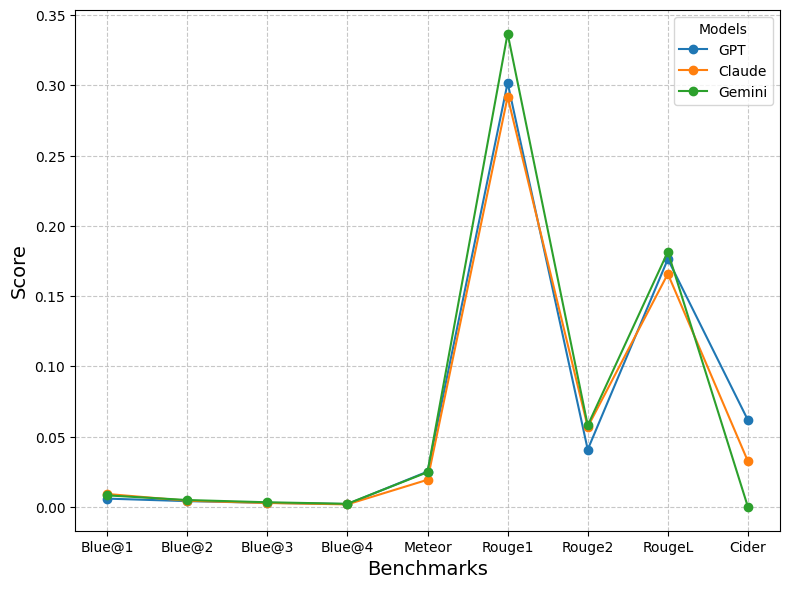

In [16]:
line_graph(data=mi_df, title="Model Performance Across All Benchmarks For the Medium Category MI", image_name="mc_mi_model_metrics_comparison_line_charts")

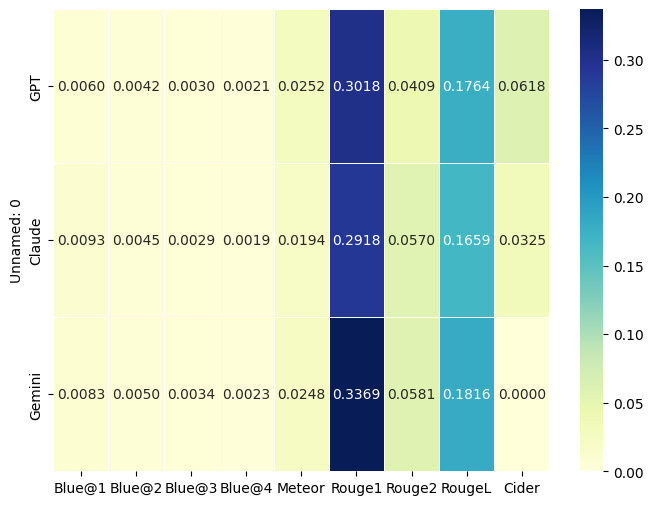

In [17]:
heatmap_graph(data=mi_df, title="Model Performance Heatmap For the Medium Category MI", image_name="mc_mi_model_metrics_comparison_heatmap")

In [59]:
mos_df = draw_table(gpt_mos_scores, claude_mos_scores, gemini_mos_scores)
# Display the table
print(mos_df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0057  0.0039  0.0027  0.0019  0.0223  0.3023  0.0475  0.1695  0.0007
Claude  0.0058  0.0038  0.0026  0.0018  0.0205  0.3627  0.0930  0.2094  0.1127
Gemini  0.0053  0.0038  0.0027  0.0019  0.0214  0.3104  0.0573  0.1695  0.0070


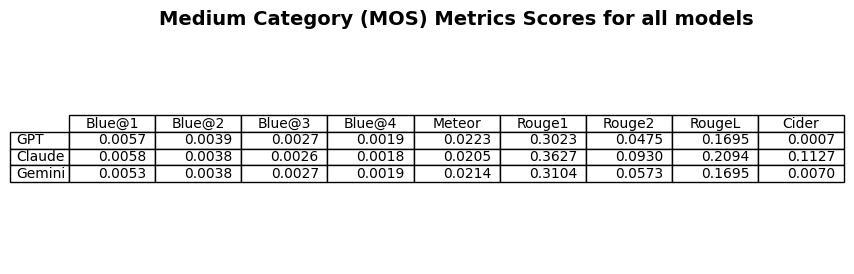

In [60]:
save_df_to_csv(mos_df, 'mc_mos_model_metrics_table', 'Medium Category (MOS) Metrics Scores for all models')

In [18]:
# Load the data from Excel file
mos_df = pd.read_excel('mc_mos_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
mos_df = mos_df.set_index(mos_df.columns[0])

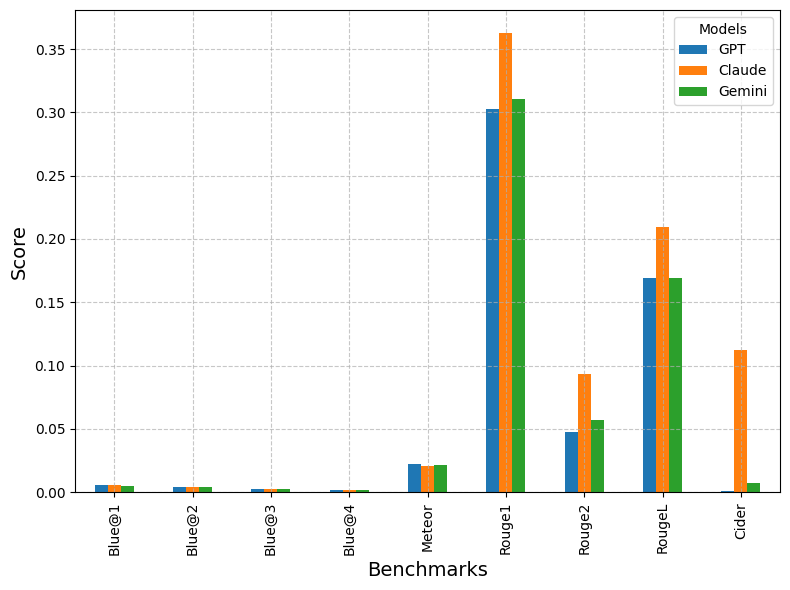

In [19]:
bar_graph(data=mos_df, title="Model Performance Across All Benchmarks For the Medium Category MOS", image_name="mc_mos_model_metrics_comparison_bar_charts")

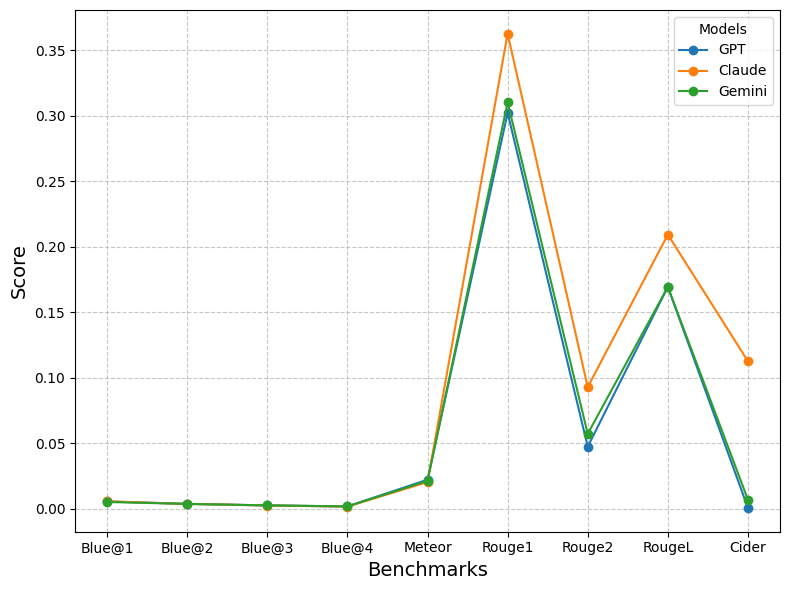

In [20]:
line_graph(data=mos_df, title="Model Performance Across All Benchmarks For the Medium Category MOS", image_name="mc_mos_model_metrics_comparison_line_charts")

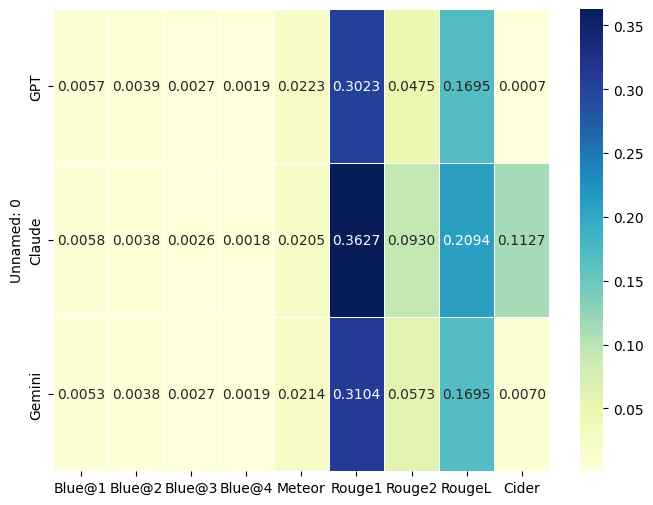

In [21]:
heatmap_graph(data=mos_df, title="Model Performance Heatmap For the Medium Category MOS", image_name="mc_mos_model_metrics_comparison_heatmap")

## 3- Difficult Category

In [65]:
ground_truth_file_path = "./dataset_labels/dc_videos_labels.json"
# Read the JSON file for this Category
with open(ground_truth_file_path, 'r', encoding='utf-8') as file:
    dc_data = json.load(file)

In [66]:
dc_labels_list = [item['Captions'] for item in dc_data]
dc_csm_labels_list = [item['Captions'] for item in dc_data if item['sub_category'] == "Complex_sound_and_motion"]
dc_cw_labels_list = [item['Captions'] for item in dc_data if item['sub_category'] == "Context_window"]
dc_had_labels_list = [item['Captions'] for item in dc_data if item['sub_category'] == "High_activity_and_distractions"]
dc_poo_labels_list = [item['Captions'] for item in dc_data if item['sub_category'] == "Partially_observed_objects"]
dc_stcb_labels_list = [item['Captions'] for item in dc_data if item['sub_category'] == "Scene_transitions_and_changing_backgrounds"]

In [67]:
print(f"All Categories Captions : {len(dc_labels_list)} items")
print(f"Complex Sound and Motion Category's Captions : {len(dc_csm_labels_list)} items")
print(f"Context Window Category's Captions : {len(dc_cw_labels_list)} items")
print(f"High Activity and distractions Category's Captions : {len(dc_had_labels_list)} items")
print(f"Partially Observed Objects Category's Captions : {len(dc_poo_labels_list)} items")
print(f"Scene Transitions and Changing Backgrounds Category's Captions : {len(dc_stcb_labels_list)} items")

All Categories Captions : 43 items
Complex Sound and Motion Category's Captions : 19 items
Context Window Category's Captions : 14 items
High Activity and distractions Category's Captions : 4 items
Partially Observed Objects Category's Captions : 2 items
Scene Transitions and Changing Backgrounds Category's Captions : 4 items


In [68]:
dc_labels_list[0]

"There are three men in a miserable place where there’s blood on the floor, it seems to be a questioning room. One is tied up, and it looks like he has been tortured badly, and others apparently are cops, and they’re arguing about him. The supervisor is asking his assistant to get the poor guy down, telling him this is against human rights. The assistant seems unhappy, which angers the boss. He gets close to hitting him before explaining that the suspect received 10 million rupees, meaning he must know more than he should, especially given his poor background. The tortured man, bleeding and desperate, insists he knew the answers. As he finishes speaking, exciting music plays, leading to a flashback of kids playing cricket. A title reads 'The Poor Millionaire', and the children shout, “Jamal, catch it!” While chasing the ball, Jamal is nearly hit by a plane and falls. His teammates get mad, and the police arrive to remove them since they were playing on the runway, forcing the kids to f

### 3.1 GPT

In [69]:
generated_captions_gpt_path = "./results/GPT/dc_videos_described_gpt.json"
# Read the JSON file for this Category
with open(generated_captions_gpt_path, 'r', encoding='utf-8') as file:
    gpt_data = json.load(file)

In [70]:
dc_gpt_captions_list = [item['summary'] for item in gpt_data]
dc_csm_gpt_captions_list = [item['summary'] for item in gpt_data if item['sub_category'] == "Complex_sound_and_motion"]
dc_cw_gpt_captions_list = [item['summary'] for item in gpt_data if item['sub_category'] == "Context_window"]
dc_had_gpt_captions_list = [item['summary'] for item in gpt_data if item['sub_category'] == "High_activity_and_distractions"]
dc_poo_gpt_captions_list = [item['summary'] for item in gpt_data if item['sub_category'] == "Partially_observed_objects"]
dc_stcb_gpt_captions_list = [item['summary'] for item in gpt_data if item['sub_category'] == "Scene_transitions_and_changing_backgrounds"]

In [71]:
print(f"All Categories Captions : {len(dc_gpt_captions_list)} items")
print(f"Complex Sound and Motion Category's Captions : {len(dc_csm_gpt_captions_list)} items")
print(f"Context Window Category's Captions : {len(dc_cw_gpt_captions_list)} items")
print(f"High Activity and distractions Category's Captions : {len(dc_had_gpt_captions_list)} items")
print(f"Partially Observed Objects Category's Captions : {len(dc_poo_gpt_captions_list)} items")
print(f"Scene Transitions and Changing Backgrounds Category's Captions : {len(dc_stcb_gpt_captions_list)} items")

All Categories Captions : 43 items
Complex Sound and Motion Category's Captions : 19 items
Context Window Category's Captions : 14 items
High Activity and distractions Category's Captions : 4 items
Partially Observed Objects Category's Captions : 2 items
Scene Transitions and Changing Backgrounds Category's Captions : 4 items


In [72]:
dc_gpt_captions_list[0]

'The video presents a tense and dramatic narrative centered around a young man, possibly a detainee, who is in a vulnerable position, suspended and distressed. The setting is a dimly lit, bleak room that suggests an interrogation or oppressive atmosphere, with peeling walls and minimal furnishings, enhancing the sense of urgency and conflict. \n\nThroughout the frames, various characters interact intensely, with one authority figure in a uniform confronting another man, who appears anxious or defiant. The dialogue, conveyed through Arabic subtitles, hints at serious themes of human rights violations and the implications of knowledge and truth. The repeated phrases in the audio transcription, such as "Get him down!" and references to "answers," suggest a critical moment where the stakes are high, and the characters are grappling with the consequences of their actions.\n\nThe narrative also includes scenes of youthful exuberance, featuring a young boy named Jamal, who is engaged in playf

#### 3.1.1 Blue Metric

In [73]:
# Evaluate GPT using the Bleu metric
gpt_all_scores = bleu_metric('GPT', dc_labels_list, dc_gpt_captions_list)
print("************************************")
gpt_csm_scores = bleu_metric('GPT', dc_csm_labels_list, dc_csm_gpt_captions_list)
print("************************************")
gpt_cw_scores = bleu_metric('GPT', dc_cw_labels_list, dc_cw_gpt_captions_list)
print("************************************")
gpt_had_scores = bleu_metric('GPT', dc_had_labels_list, dc_had_gpt_captions_list)
print("************************************")
gpt_poo_scores = bleu_metric('GPT', dc_poo_labels_list, dc_poo_gpt_captions_list)
print("************************************")
gpt_stcb_scores = bleu_metric('GPT', dc_stcb_labels_list, dc_stcb_gpt_captions_list)

BLEU@1 Score: 0.0051110157615574595
BLEU@2 Score: 0.0035001438447593573
BLEU@3 Score: 0.0024582662554710937
BLEU@4 Score: 0.0017352054332771625
************************************
BLEU@1 Score: 0.00487344513367047
BLEU@2 Score: 0.0033654412172148553
BLEU@3 Score: 0.00236885397858826
BLEU@4 Score: 0.0016736808810357054
************************************
BLEU@1 Score: 0.005000286256748395
BLEU@2 Score: 0.0034061509528831723
BLEU@3 Score: 0.0023884702231163376
BLEU@4 Score: 0.0016845548281881704
************************************
BLEU@1 Score: 0.005511015809605231
BLEU@2 Score: 0.003488842379777591
BLEU@3 Score: 0.0023947904420297786
BLEU@4 Score: 0.0016719705130760088
************************************
BLEU@1 Score: 0.004898438248538851
BLEU@2 Score: 0.003472248422762284
BLEU@3 Score: 0.0024613165501011433
BLEU@4 Score: 0.0017447279239515999
************************************
BLEU@1 Score: 0.006333318219313902
BLEU@2 Score: 0.004494205623142698
BLEU@3 Score: 0.003189211350032492

#### 3.1.2 Meteor Metric

In [74]:
# Evaluate GPT using the Meteor metric
gpt_all_scores.extend(meteor_metric('GPT', dc_labels_list, dc_gpt_captions_list))
print("************************************")
gpt_csm_scores.extend(meteor_metric('GPT', dc_csm_labels_list, dc_csm_gpt_captions_list))
print("************************************")
gpt_cw_scores.extend(meteor_metric('GPT', dc_cw_labels_list, dc_cw_gpt_captions_list))
print("************************************")
gpt_had_scores.extend(meteor_metric('GPT', dc_had_labels_list, dc_had_gpt_captions_list))
print("************************************")
gpt_poo_scores.extend(meteor_metric('GPT', dc_poo_labels_list, dc_poo_gpt_captions_list))
print("************************************")
gpt_stcb_scores.extend(meteor_metric('GPT', dc_stcb_labels_list, dc_stcb_gpt_captions_list))

meteor Score: 0.020208188511748923
************************************
meteor Score: 0.019412531673245182
************************************
meteor Score: 0.01975870362563894
************************************
meteor Score: 0.01897915969669644
************************************
meteor Score: 0.02095021037868163
************************************
meteor Score: 0.02641877347761275


#### 3.1.3 Rouge Metric

In [75]:
# Evaluate GPT using the Rouge metric
gpt_all_scores.extend(rouge_metric('GPT', dc_labels_list, dc_gpt_captions_list))
print("************************************")
gpt_csm_scores.extend(rouge_metric('GPT', dc_csm_labels_list, dc_csm_gpt_captions_list))
print("************************************")
gpt_cw_scores.extend(rouge_metric('GPT', dc_cw_labels_list, dc_cw_gpt_captions_list))
print("************************************")
gpt_had_scores.extend(rouge_metric('GPT', dc_had_labels_list, dc_had_gpt_captions_list))
print("************************************")
gpt_poo_scores.extend(rouge_metric('GPT', dc_poo_labels_list, dc_poo_gpt_captions_list))
print("************************************")
gpt_stcb_scores.extend(rouge_metric('GPT', dc_stcb_labels_list, dc_stcb_gpt_captions_list))

Rouge Score: {'rouge1': 0.27784901621868763, 'rouge2': 0.04093503241055865, 'rougeL': 0.157774040715845}
************************************
Rouge Score: {'rouge1': 0.2609450595326933, 'rouge2': 0.030975318078843656, 'rougeL': 0.15012337184575406}
************************************
Rouge Score: {'rouge1': 0.269629304276455, 'rouge2': 0.03869469117775045, 'rougeL': 0.14944217452424802}
************************************
Rouge Score: {'rouge1': 0.30308078165321345, 'rouge2': 0.04842159347532514, 'rougeL': 0.1701855636701303}
************************************
Rouge Score: {'rouge1': 0.37743348982785596, 'rouge2': 0.09467654986522911, 'rougeL': 0.18773082942097025}
************************************
Rouge Score: {'rouge1': 0.3118878000358648, 'rouge2': 0.0617275500089319, 'rougeL': 0.19588633221251828}


#### 3.1.4 Cider Metric

In [76]:
# Evaluate GPT using the Cider metric
gpt_all_scores.extend(cider_metric('GPT', dc_labels_list, dc_gpt_captions_list))
print("************************************")
gpt_csm_scores.extend(cider_metric('GPT', dc_csm_labels_list, dc_csm_gpt_captions_list))
print("************************************")
gpt_cw_scores.extend(cider_metric('GPT', dc_cw_labels_list, dc_cw_gpt_captions_list))
print("************************************")
gpt_had_scores.extend(cider_metric('GPT', dc_had_labels_list, dc_had_gpt_captions_list))
print("************************************")
gpt_poo_scores.extend(cider_metric('GPT', dc_poo_labels_list, dc_poo_gpt_captions_list))
print("************************************")
gpt_stcb_scores.extend(cider_metric('GPT', dc_stcb_labels_list, dc_stcb_gpt_captions_list))

Cider Score: 0.007582615747155817
************************************
Cider Score: 0.00418494120632579
************************************
Cider Score: 0.0037915213088475517
************************************
Cider Score: 0.011357482815808473
************************************
Cider Score: 0.0032319461711424846
************************************
Cider Score: 0.06505840023868872


In [77]:
gpt_all_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.0051110157615574595},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.0035001438447593573},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.0024582662554710937},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.0017352054332771625},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.020208188511748923},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.27784901621868763},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.04093503241055865},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.157774040715845},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.007582615747155817}]

In [78]:
gpt_csm_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.00487344513367047},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.0033654412172148553},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.00236885397858826},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.0016736808810357054},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.019412531673245182},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.2609450595326933},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.030975318078843656},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.15012337184575406},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.00418494120632579}]

In [79]:
gpt_cw_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.005000286256748395},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.0034061509528831723},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.0023884702231163376},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.0016845548281881704},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.01975870362563894},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.269629304276455},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.03869469117775045},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.14944217452424802},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.0037915213088475517}]

In [80]:
gpt_had_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.005511015809605231},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.003488842379777591},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.0023947904420297786},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.0016719705130760088},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.01897915969669644},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.30308078165321345},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.04842159347532514},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.1701855636701303},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.011357482815808473}]

In [81]:
gpt_poo_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.004898438248538851},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.003472248422762284},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.0024613165501011433},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.0017447279239515999},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.02095021037868163},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.37743348982785596},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.09467654986522911},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.18773082942097025},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.0032319461711424846}]

In [82]:
gpt_stcb_scores

[{'model': 'GPT', 'Metric_name': 'BLEU@1', 'Score': 0.006333318219313902},
 {'model': 'GPT', 'Metric_name': 'BLEU@2', 'Score': 0.004494205623142698},
 {'model': 'GPT', 'Metric_name': 'BLEU@3', 'Score': 0.003189211350032492},
 {'model': 'GPT', 'Metric_name': 'BLEU@4', 'Score': 0.002263197849099495},
 {'model': 'GPT', 'Metric_name': 'Meteor', 'Score': 0.02641877347761275},
 {'model': 'GPT', 'Metric_name': 'rouge1', 'Score': 0.3118878000358648},
 {'model': 'GPT', 'Metric_name': 'rouge2', 'Score': 0.0617275500089319},
 {'model': 'GPT', 'Metric_name': 'rougeL', 'Score': 0.19588633221251828},
 {'model': 'GPT', 'Metric_name': 'Cider', 'Score': 0.06505840023868872}]

### 3.2 Claude

In [83]:
generated_captions_claude_path = "./results/Claude/dc_videos_described_claude.json"
# Read the JSON file for this Category
with open(generated_captions_claude_path, 'r', encoding='utf-8') as file:
    claude_data = json.load(file)

In [84]:
dc_claude_captions_list = [item['summary'] for item in claude_data]
dc_csm_claude_captions_list = [item['summary'] for item in claude_data if item['sub_category'] == "Complex_sound_and_motion"]
dc_cw_claude_captions_list = [item['summary'] for item in claude_data if item['sub_category'] == "Context_window"]
dc_had_claude_captions_list = [item['summary'] for item in claude_data if item['sub_category'] == "High_activity_and_distractions"]
dc_poo_claude_captions_list = [item['summary'] for item in claude_data if item['sub_category'] == "Partially_observed_objects"]
dc_stcb_claude_captions_list = [item['summary'] for item in claude_data if item['sub_category'] == "Scene_transitions_and_changing_backgrounds"]

In [85]:
print(f"All Categories Captions : {len(dc_claude_captions_list)} items")
print(f"Complex Sound and Motion Category's Captions : {len(dc_csm_claude_captions_list)} items")
print(f"Context Window Category's Captions : {len(dc_cw_claude_captions_list)} items")
print(f"High Activity and distractions Category's Captions : {len(dc_had_claude_captions_list)} items")
print(f"Partially Observed Objects Category's Captions : {len(dc_poo_claude_captions_list)} items")
print(f"Scene Transitions and Changing Backgrounds Category's Captions : {len(dc_stcb_claude_captions_list)} items")

All Categories Captions : 43 items
Complex Sound and Motion Category's Captions : 19 items
Context Window Category's Captions : 14 items
High Activity and distractions Category's Captions : 4 items
Partially Observed Objects Category's Captions : 2 items
Scene Transitions and Changing Backgrounds Category's Captions : 4 items


In [86]:
dc_claude_captions_list[0]

'Based on the images and audio transcription, this appears to be scenes from the movie "Slumdog Millionaire", a film about a young man from the slums of Mumbai who becomes a contestant on the Indian version of "Who Wants to Be a Millionaire?" \n\nThe video clips seem to capture various key moments from the film, showing the protagonist Jamal Malik in different scenes - some tense interrogation moments, some playful childhood scenes, and scenes that appear to be from the game show or related investigations.\n\nThe audio transcript suggests a confrontational scene where Jamal is being questioned about how he knows the answers to the game show questions. The dialogue includes phrases like "What the hell can a slum dog possibly know?" and "Get him down!", indicating an intense interrogation sequence.\n\nThe scenes shift between different stages of Jamal\'s life - showing him as a child, in moments of play and struggle, and later as a contestant on the game show. The Arabic subtitles and "E

#### 3.2.1 Blue Metric

In [87]:
# Evaluate Claude using the Bleu metric
claude_all_scores = bleu_metric('Claude', dc_labels_list, dc_claude_captions_list)
print("************************************")
claude_csm_scores = bleu_metric('Claude', dc_csm_labels_list, dc_csm_claude_captions_list)
print("************************************")
claude_cw_scores = bleu_metric('Claude', dc_cw_labels_list, dc_cw_claude_captions_list)
print("************************************")
claude_had_scores = bleu_metric('Claude', dc_had_labels_list, dc_had_claude_captions_list)
print("************************************")
claude_poo_scores = bleu_metric('Claude', dc_poo_labels_list, dc_poo_claude_captions_list)
print("************************************")
claude_stcb_scores = bleu_metric('Claude', dc_stcb_labels_list, dc_stcb_claude_captions_list)

BLEU@1 Score: 0.007925232286658758
BLEU@2 Score: 0.0042521334372841845
BLEU@3 Score: 0.0027691275778674584
BLEU@4 Score: 0.0018843232032446121
************************************
BLEU@1 Score: 0.007287844945271451
BLEU@2 Score: 0.004104387697912402
BLEU@3 Score: 0.002716764261602365
BLEU@4 Score: 0.0018637757341449103
************************************
BLEU@1 Score: 0.008012639954591918
BLEU@2 Score: 0.004236841156753524
BLEU@3 Score: 0.0027490824570072163
BLEU@4 Score: 0.001867652152459096
************************************
BLEU@1 Score: 0.009402452472782503
BLEU@2 Score: 0.004712331607894784
BLEU@3 Score: 0.0029756176121507644
BLEU@4 Score: 0.0019907077175635064
************************************
BLEU@1 Score: 0.009498834498834503
BLEU@2 Score: 0.004463073204479149
BLEU@3 Score: 0.0027955374344682074
BLEU@4 Score: 0.0018678568970338458
************************************
BLEU@1 Score: 0.008382874028270797
BLEU@2 Score: 0.004441780626949384
BLEU@3 Score: 0.002868316290553829
B

#### 3.2.2 Meteor Metric

In [88]:
# Evaluate Claude using the Meteor metric
claude_all_scores.extend(meteor_metric('Claude', dc_labels_list, dc_claude_captions_list))
print("************************************")
claude_csm_scores.extend(meteor_metric('Claude', dc_csm_labels_list, dc_csm_claude_captions_list))
print("************************************")
claude_cw_scores.extend(meteor_metric('Claude', dc_cw_labels_list, dc_cw_claude_captions_list))
print("************************************")
claude_had_scores.extend(meteor_metric('Claude', dc_had_labels_list, dc_had_claude_captions_list))
print("************************************")
claude_poo_scores.extend(meteor_metric('Claude', dc_poo_labels_list, dc_poo_claude_captions_list))
print("************************************")
claude_stcb_scores.extend(meteor_metric('Claude', dc_stcb_labels_list, dc_stcb_claude_captions_list))

meteor Score: 0.019576587177989768
************************************
meteor Score: 0.01970550312169893
************************************
meteor Score: 0.01944689945488395
************************************
meteor Score: 0.019718916865718528
************************************
meteor Score: 0.01877437557049208
************************************
meteor Score: 0.01967691959226169


#### 3.2.3 Rouge Metric

In [89]:
# Evaluate Claude using the Rouge metric
claude_all_scores.extend(rouge_metric('Claude', dc_labels_list, dc_claude_captions_list))
print("************************************")
claude_csm_scores.extend(rouge_metric('Claude', dc_csm_labels_list, dc_csm_claude_captions_list))
print("************************************")
claude_cw_scores.extend(rouge_metric('Claude', dc_cw_labels_list, dc_cw_claude_captions_list))
print("************************************")
claude_had_scores.extend(rouge_metric('Claude', dc_had_labels_list, dc_had_claude_captions_list))
print("************************************")
claude_poo_scores.extend(rouge_metric('Claude', dc_poo_labels_list, dc_poo_claude_captions_list))
print("************************************")
claude_stcb_scores.extend(rouge_metric('Claude', dc_stcb_labels_list, dc_stcb_claude_captions_list))

Rouge Score: {'rouge1': 0.2895845081662646, 'rouge2': 0.048210563407306666, 'rougeL': 0.14884009077916244}
************************************
Rouge Score: {'rouge1': 0.2741708947811228, 'rouge2': 0.03886666660009769, 'rougeL': 0.14266936846214417}
************************************
Rouge Score: {'rouge1': 0.29286362254193943, 'rouge2': 0.050241487013107565, 'rougeL': 0.1446483882207433}
************************************
Rouge Score: {'rouge1': 0.29158388910571514, 'rouge2': 0.052170604197979475, 'rougeL': 0.15900625243221517}
************************************
Rouge Score: {'rouge1': 0.3501474802152136, 'rouge2': 0.07145585288223506, 'rougeL': 0.17524669630294448}
************************************
Rouge Score: {'rouge1': 0.31904140446690016, 'rouge2': 0.06990315509310907, 'rougeL': 0.16945251632452246}


#### 3.2.4 Cider Metric

In [90]:
# Evaluate Claude using the Cider metric
claude_all_scores.extend(cider_metric('Claude', dc_labels_list, dc_claude_captions_list))
print("************************************")
claude_csm_scores.extend(cider_metric('Claude', dc_csm_labels_list, dc_csm_claude_captions_list))
print("************************************")
claude_cw_scores.extend(cider_metric('Claude', dc_cw_labels_list, dc_cw_claude_captions_list))
print("************************************")
claude_had_scores.extend(cider_metric('Claude', dc_had_labels_list, dc_had_claude_captions_list))
print("************************************")
claude_poo_scores.extend(cider_metric('Claude', dc_poo_labels_list, dc_poo_claude_captions_list))
print("************************************")
claude_stcb_scores.extend(cider_metric('Claude', dc_stcb_labels_list, dc_stcb_claude_captions_list))

Cider Score: 0.01953669049341956
************************************
Cider Score: 0.0008274284023211211
************************************
Cider Score: 0.002306053078282317
************************************
Cider Score: 0.07866464948043288
************************************
Cider Score: 2.2493266931932412e-05
************************************
Cider Score: 0.14011036462436274


In [91]:
claude_all_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.007925232286658758},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.0042521334372841845},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.0027691275778674584},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.0018843232032446121},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.019576587177989768},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.2895845081662646},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.048210563407306666},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.14884009077916244},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 0.01953669049341956}]

In [92]:
claude_csm_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.007287844945271451},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.004104387697912402},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.002716764261602365},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.0018637757341449103},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.01970550312169893},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.2741708947811228},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.03886666660009769},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.14266936846214417},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 0.0008274284023211211}]

In [93]:
claude_cw_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.008012639954591918},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.004236841156753524},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.0027490824570072163},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.001867652152459096},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.01944689945488395},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.29286362254193943},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.050241487013107565},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.1446483882207433},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 0.002306053078282317}]

In [94]:
claude_had_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.009402452472782503},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.004712331607894784},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.0029756176121507644},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.0019907077175635064},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.019718916865718528},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.29158388910571514},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.052170604197979475},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.15900625243221517},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 0.07866464948043288}]

In [95]:
claude_poo_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.009498834498834503},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.004463073204479149},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.0027955374344682074},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.0018678568970338458},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.01877437557049208},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.3501474802152136},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.07145585288223506},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.17524669630294448},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 2.2493266931932412e-05}]

In [96]:
claude_stcb_scores

[{'model': 'Claude', 'Metric_name': 'BLEU@1', 'Score': 0.008382874028270797},
 {'model': 'Claude', 'Metric_name': 'BLEU@2', 'Score': 0.004441780626949384},
 {'model': 'Claude', 'Metric_name': 'BLEU@3', 'Score': 0.002868316290553829},
 {'model': 'Claude', 'Metric_name': 'BLEU@4', 'Score': 0.0019421209980039907},
 {'model': 'Claude', 'Metric_name': 'Meteor', 'Score': 0.01967691959226169},
 {'model': 'Claude', 'Metric_name': 'rouge1', 'Score': 0.31904140446690016},
 {'model': 'Claude', 'Metric_name': 'rouge2', 'Score': 0.06990315509310907},
 {'model': 'Claude', 'Metric_name': 'rougeL', 'Score': 0.16945251632452246},
 {'model': 'Claude', 'Metric_name': 'Cider', 'Score': 0.14011036462436274}]

### 3.3 Gemini

In [97]:
generated_captions_gemini_path = "./results/Gemini/dc_videos_described_gemini.json"
# Read the JSON file for this Category
with open(generated_captions_gemini_path, 'r', encoding='utf-8') as file:
    gemini_data = json.load(file)

In [98]:
dc_gemini_captions_list = [item['summary'] for item in gemini_data]
dc_csm_gemini_captions_list = [item['summary'] for item in gemini_data if item['sub_category'] == "Complex_sound_and_motion"]
dc_cw_gemini_captions_list = [item['summary'] for item in gemini_data if item['sub_category'] == "Context_window"]
dc_had_gemini_captions_list = [item['summary'] for item in gemini_data if item['sub_category'] == "High_activity_and_distractions"]
dc_poo_gemini_captions_list = [item['summary'] for item in gemini_data if item['sub_category'] == "Partially_observed_objects"]
dc_stcb_gemini_captions_list = [item['summary'] for item in gemini_data if item['sub_category'] == "Scene_transitions_and_changing_backgrounds"]

In [99]:
print(f"All Categories Captions : {len(dc_gemini_captions_list)} items")
print(f"Complex Sound and Motion Category's Captions : {len(dc_csm_gemini_captions_list)} items")
print(f"Context Window Category's Captions : {len(dc_cw_gemini_captions_list)} items")
print(f"High Activity and distractions Category's Captions : {len(dc_had_gemini_captions_list)} items")
print(f"Partially Observed Objects Category's Captions : {len(dc_poo_gemini_captions_list)} items")
print(f"Scene Transitions and Changing Backgrounds Category's Captions : {len(dc_stcb_gemini_captions_list)} items")

All Categories Captions : 43 items
Complex Sound and Motion Category's Captions : 19 items
Context Window Category's Captions : 14 items
High Activity and distractions Category's Captions : 4 items
Partially Observed Objects Category's Captions : 2 items
Scene Transitions and Changing Backgrounds Category's Captions : 4 items


In [100]:
dc_gemini_captions_list[0]

"This video appears to be a scene from an Egyptian film or television show ('EgyBest' watermark is consistently present), possibly a thriller or crime drama, focusing on a tense interrogation or torture scene.  The narrative centers around a man held captive and seemingly tortured, suspended upside down in a dilapidated room.  Three men are involved: a uniformed man, another in civilian clothes (who is often shown in close-ups displaying concern or distress), and the bound victim.  Arabic subtitles accompany the action throughout.\n\nThe video also features flashbacks or interspersed scenes showcasing the victim, a young boy named Jamal, in various situations. These scenes portray Jamal in a range of contexts: playing a game (possibly cricket), running, appearing distressed or fearful, and interacting with other boys in seemingly impoverished surroundings.  The English subtitles in these scenes often contain phrases like 'Jamal, catch it!', 'Jamal, it is yours!', and 'Catch him!', sugg

#### 3.2.1 Blue Metric

In [101]:
# Evaluate Gemini using the Bleu metric
gemini_all_scores = bleu_metric('Gemini', dc_labels_list, dc_gemini_captions_list)
print("************************************")
gemini_csm_scores = bleu_metric('Gemini', dc_csm_labels_list, dc_csm_gemini_captions_list)
print("************************************")
gemini_cw_scores = bleu_metric('Gemini', dc_cw_labels_list, dc_cw_gemini_captions_list)
print("************************************")
gemini_had_scores = bleu_metric('Gemini', dc_had_labels_list, dc_had_gemini_captions_list)
print("************************************")
gemini_poo_scores = bleu_metric('Gemini', dc_poo_labels_list, dc_poo_gemini_captions_list)
print("************************************")
gemini_stcb_scores = bleu_metric('Gemini', dc_stcb_labels_list, dc_stcb_gemini_captions_list)

BLEU@1 Score: 0.006151461877960662
BLEU@2 Score: 0.0036668305621079997
BLEU@3 Score: 0.002473667138976644
BLEU@4 Score: 0.0017130870562041662
************************************
BLEU@1 Score: 0.005201806172143584
BLEU@2 Score: 0.0031980213843831435
BLEU@3 Score: 0.00217520564979461
BLEU@4 Score: 0.0015119206442760127
************************************
BLEU@1 Score: 0.007200238227328057
BLEU@2 Score: 0.004087973557227225
BLEU@3 Score: 0.002720455815267788
BLEU@4 Score: 0.0018722072186216582
************************************
BLEU@1 Score: 0.006974458553673814
BLEU@2 Score: 0.0037451343665725954
BLEU@3 Score: 0.002430412724398803
BLEU@4 Score: 0.0016496567853549746
************************************
BLEU@1 Score: 0.0058919068353030625
BLEU@2 Score: 0.004178591816591875
BLEU@3 Score: 0.0029635291323985803
BLEU@4 Score: 0.002101811058222683
************************************
BLEU@1 Score: 0.00629839010342155
BLEU@2 Score: 0.0040854892416772315
BLEU@3 Score: 0.002825922263439179
BL

#### 3.2.2 Meteor Metric

In [102]:
# Evaluate Gemini using the Meteor metric
gemini_all_scores.extend(meteor_metric('Gemini', dc_labels_list, dc_gemini_captions_list))
print("************************************")
gemini_csm_scores.extend(meteor_metric('Gemini', dc_csm_labels_list, dc_csm_gemini_captions_list))
print("************************************")
gemini_cw_scores.extend(meteor_metric('Gemini', dc_cw_labels_list, dc_cw_gemini_captions_list))
print("************************************")
gemini_had_scores.extend(meteor_metric('Gemini', dc_had_labels_list, dc_had_gemini_captions_list))
print("************************************")
gemini_poo_scores.extend(meteor_metric('Gemini', dc_poo_labels_list, dc_poo_gemini_captions_list))
print("************************************")
gemini_stcb_scores.extend(meteor_metric('Gemini', dc_stcb_labels_list, dc_stcb_gemini_captions_list))

meteor Score: 0.018440622923336838
************************************
meteor Score: 0.016498780500208997
************************************
meteor Score: 0.01962996446386775
************************************
meteor Score: 0.01683616562413316
************************************
meteor Score: 0.024856385329209023
************************************
meteor Score: 0.021898255137603514


#### 3.2.3 Rouge Metric

In [103]:
# Evaluate Gemini using the Rouge metric
gemini_all_scores.extend(rouge_metric('Gemini', dc_labels_list, dc_gemini_captions_list))
print("************************************")
gemini_csm_scores.extend(rouge_metric('Gemini', dc_csm_labels_list, dc_csm_gemini_captions_list))
print("************************************")
gemini_cw_scores.extend(rouge_metric('Gemini', dc_cw_labels_list, dc_cw_gemini_captions_list))
print("************************************")
gemini_had_scores.extend(rouge_metric('Gemini', dc_had_labels_list, dc_had_gemini_captions_list))
print("************************************")
gemini_poo_scores.extend(rouge_metric('Gemini', dc_poo_labels_list, dc_poo_gemini_captions_list))
print("************************************")
gemini_stcb_scores.extend(rouge_metric('Gemini', dc_stcb_labels_list, dc_stcb_gemini_captions_list))

Rouge Score: {'rouge1': 0.3006771084337695, 'rouge2': 0.05585258482314699, 'rougeL': 0.1589852928907951}
************************************
Rouge Score: {'rouge1': 0.274363435552784, 'rouge2': 0.044806107813105095, 'rougeL': 0.14435424898754803}
************************************
Rouge Score: {'rouge1': 0.30472023935483505, 'rouge2': 0.0522670007608906, 'rougeL': 0.15553494776153637}
************************************
Rouge Score: {'rouge1': 0.3219861318165084, 'rouge2': 0.05305353401293575, 'rougeL': 0.18171196163822717}
************************************
Rouge Score: {'rouge1': 0.4098952624528073, 'rouge2': 0.126468309122889, 'rougeL': 0.19718670076726344}
************************************
Rouge Score: {'rouge1': 0.33559799600246315, 'rouge2': 0.0883640834990834, 'rougeL': 0.1987315866979578}


#### 3.2.4 Cider Metric

In [104]:
# Evaluate Gemini using the Cider metric
gemini_all_scores.extend(cider_metric('Gemini', dc_labels_list, dc_gemini_captions_list))
print("************************************")
gemini_csm_scores.extend(cider_metric('Gemini', dc_csm_labels_list, dc_csm_gemini_captions_list))
print("************************************")
gemini_cw_scores.extend(cider_metric('Gemini', dc_cw_labels_list, dc_cw_gemini_captions_list))
print("************************************")
gemini_had_scores.extend(cider_metric('Gemini', dc_had_labels_list, dc_had_gemini_captions_list))
print("************************************")
gemini_poo_scores.extend(cider_metric('Gemini', dc_poo_labels_list, dc_poo_gemini_captions_list))
print("************************************")
gemini_stcb_scores.extend(cider_metric('Gemini', dc_stcb_labels_list, dc_stcb_gemini_captions_list))

Cider Score: 0.0038493423255189377
************************************
Cider Score: 0.006402387784328623
************************************
Cider Score: 0.0011608905456797593
************************************
Cider Score: 3.9751000295453527e-07
************************************
Cider Score: 3.887344898487544e-15
************************************
Cider Score: 0.00026520420459275946


In [105]:
gemini_all_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.006151461877960662},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.0036668305621079997},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.002473667138976644},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.0017130870562041662},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.018440622923336838},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.3006771084337695},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.05585258482314699},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.1589852928907951},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 0.0038493423255189377}]

In [106]:
gemini_csm_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.005201806172143584},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.0031980213843831435},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.00217520564979461},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.0015119206442760127},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.016498780500208997},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.274363435552784},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.044806107813105095},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.14435424898754803},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 0.006402387784328623}]

In [107]:
gemini_cw_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.007200238227328057},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.004087973557227225},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.002720455815267788},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.0018722072186216582},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.01962996446386775},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.30472023935483505},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.0522670007608906},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.15553494776153637},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 0.0011608905456797593}]

In [108]:
gemini_had_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.006974458553673814},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.0037451343665725954},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.002430412724398803},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.0016496567853549746},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.01683616562413316},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.3219861318165084},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.05305353401293575},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.18171196163822717},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 3.9751000295453527e-07}]

In [109]:
gemini_poo_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.0058919068353030625},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.004178591816591875},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.0029635291323985803},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.002101811058222683},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.024856385329209023},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.4098952624528073},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.126468309122889},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.19718670076726344},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 3.887344898487544e-15}]

In [110]:
gemini_stcb_scores

[{'model': 'Gemini', 'Metric_name': 'BLEU@1', 'Score': 0.00629839010342155},
 {'model': 'Gemini', 'Metric_name': 'BLEU@2', 'Score': 0.0040854892416772315},
 {'model': 'Gemini', 'Metric_name': 'BLEU@3', 'Score': 0.002825922263439179},
 {'model': 'Gemini', 'Metric_name': 'BLEU@4', 'Score': 0.0019807752142416025},
 {'model': 'Gemini', 'Metric_name': 'Meteor', 'Score': 0.021898255137603514},
 {'model': 'Gemini', 'Metric_name': 'rouge1', 'Score': 0.33559799600246315},
 {'model': 'Gemini', 'Metric_name': 'rouge2', 'Score': 0.0883640834990834},
 {'model': 'Gemini', 'Metric_name': 'rougeL', 'Score': 0.1987315866979578},
 {'model': 'Gemini', 'Metric_name': 'Cider', 'Score': 0.00026520420459275946}]

## Display the results with a pandas' table

In [111]:
df = draw_table(gpt_all_scores, claude_all_scores, gemini_all_scores)
# Display the table
print(df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0051  0.0035  0.0025  0.0017  0.0202  0.2778  0.0409  0.1578  0.0076
Claude  0.0079  0.0043  0.0028  0.0019  0.0196  0.2896  0.0482  0.1488  0.0195
Gemini  0.0062  0.0037  0.0025  0.0017  0.0184  0.3007  0.0559  0.1590  0.0038


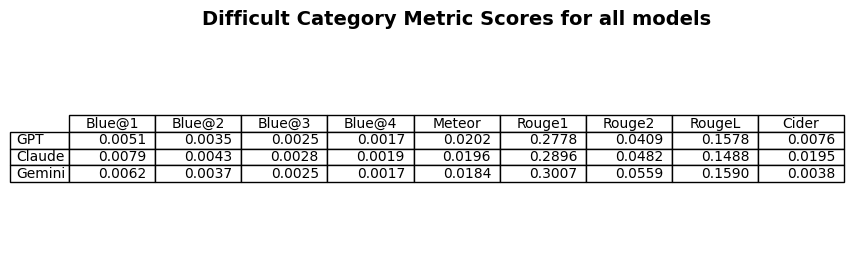

In [112]:
save_df_to_csv(df, 'dc_model_metrics_table', 'Difficult Category Metric Scores for all models')

In [22]:
# Load the data from Excel file
df = pd.read_excel('dc_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
df = df.set_index(df.columns[0])

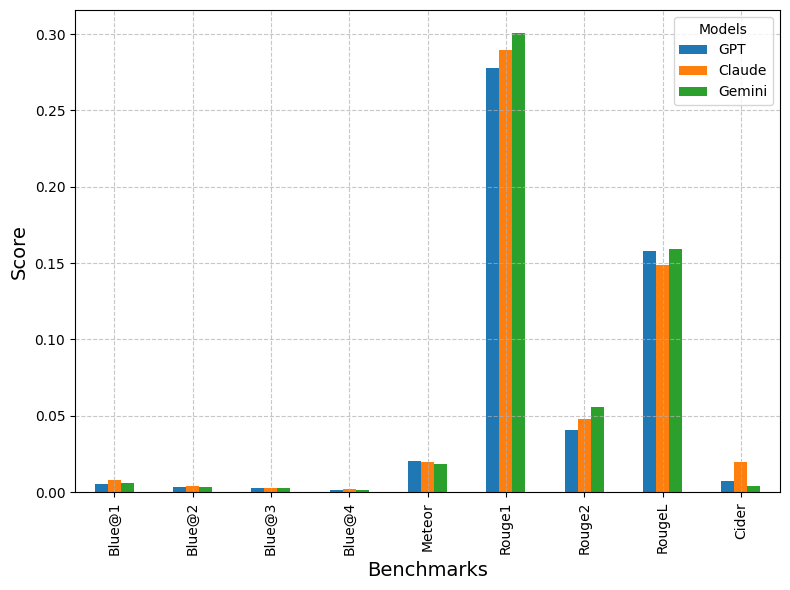

In [23]:
bar_graph(data=df, title="Model Performance Across All Benchmarks For Difficult Categories", image_name="dc_model_metrics_comparison_bar_charts")

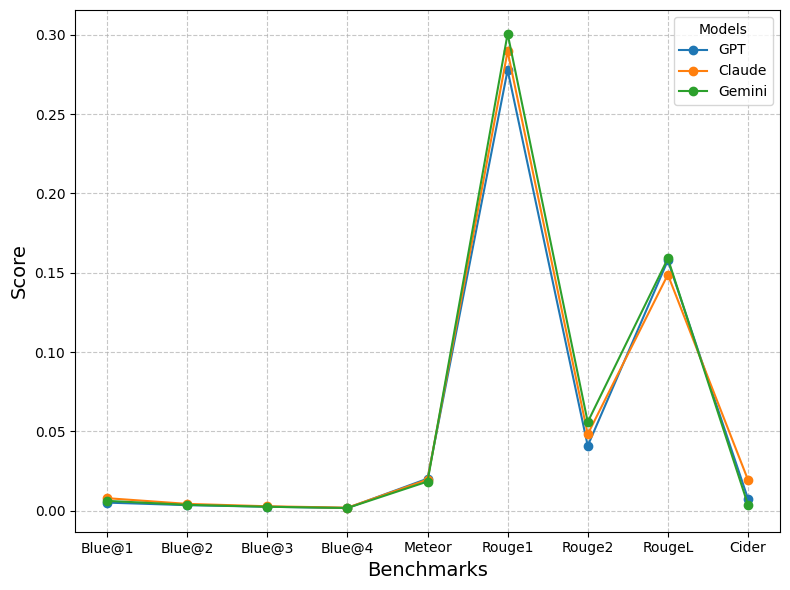

In [24]:
line_graph(data=df, title="Model Performance Trends Across Benchmarks For Difficult Categories", image_name="dc_model_metrics_comparison_line_charts")

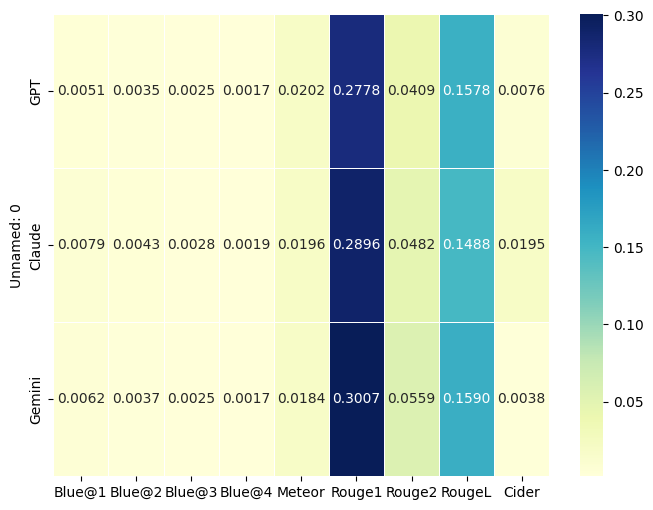

In [25]:
heatmap_graph(data=df, title="Model Performance Heatma For Difficult Categories", image_name="dc_model_metrics_comparison_heatmap")

In [118]:
csm_df = draw_table(gpt_csm_scores, claude_csm_scores, gemini_csm_scores)
# Display the table
print(csm_df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0049  0.0034  0.0024  0.0017  0.0194  0.2609  0.0310  0.1501  0.0042
Claude  0.0073  0.0041  0.0027  0.0019  0.0197  0.2742  0.0389  0.1427  0.0008
Gemini  0.0052  0.0032  0.0022  0.0015  0.0165  0.2744  0.0448  0.1444  0.0064


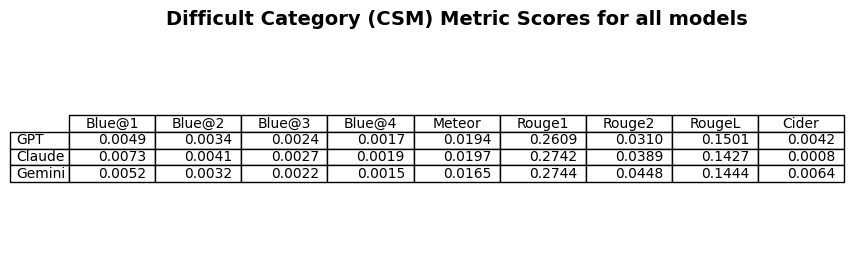

In [119]:
save_df_to_csv(csm_df, 'dc_csm_model_metrics_table', 'Difficult Category (CSM) Metric Scores for all models')

In [26]:
# Load the data from Excel file
csm_df = pd.read_excel('dc_csm_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
csm_df = csm_df.set_index(csm_df.columns[0])

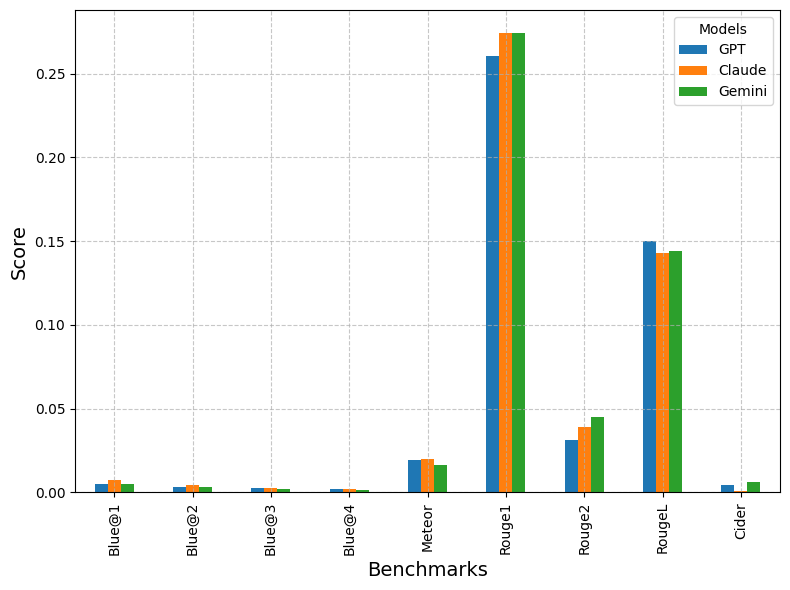

In [27]:
bar_graph(data=csm_df, title="Model Performance Across All Benchmarks For the Difficult Category CSM", image_name="dc_csm_model_metrics_comparison_bar_charts")

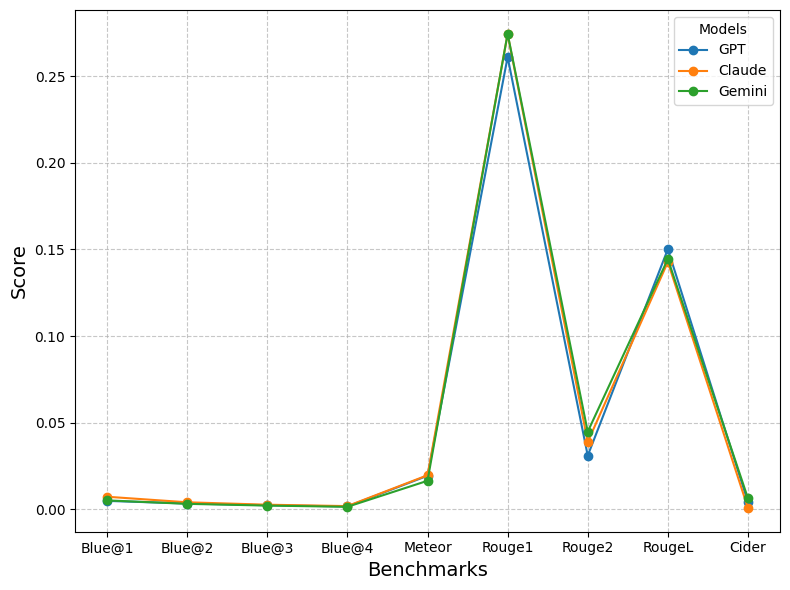

In [28]:
line_graph(data=csm_df, title="Model Performance Trends Across Benchmarks For the Difficult Category CSM", image_name="dc_csm_model_metrics_comparison_line_charts")

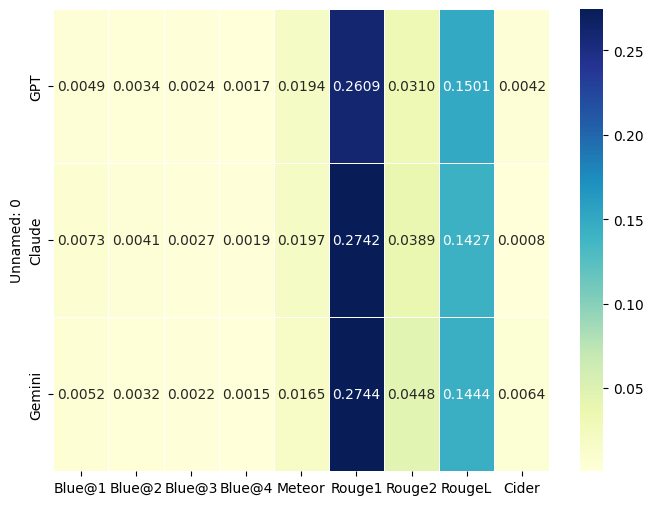

In [29]:
heatmap_graph(data=csm_df, title="Model Performance Heatma For the Difficult Category CSM", image_name="dc_csm_model_metrics_comparison_heatmap")

In [124]:
cw_df = draw_table(gpt_cw_scores, claude_cw_scores, gemini_cw_scores)
# Display the table
print(cw_df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0050  0.0034  0.0024  0.0017  0.0198  0.2696  0.0387  0.1494  0.0038
Claude  0.0080  0.0042  0.0027  0.0019  0.0194  0.2929  0.0502  0.1446  0.0023
Gemini  0.0072  0.0041  0.0027  0.0019  0.0196  0.3047  0.0523  0.1555  0.0012


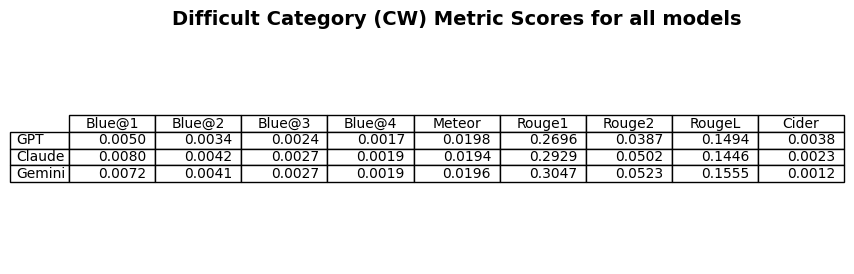

In [125]:
save_df_to_csv(cw_df, 'dc_cw_model_metrics_table', 'Difficult Category (CW) Metric Scores for all models')

In [30]:
# Load the data from Excel file
cw_df = pd.read_excel('dc_cw_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
cw_df = cw_df.set_index(cw_df.columns[0])

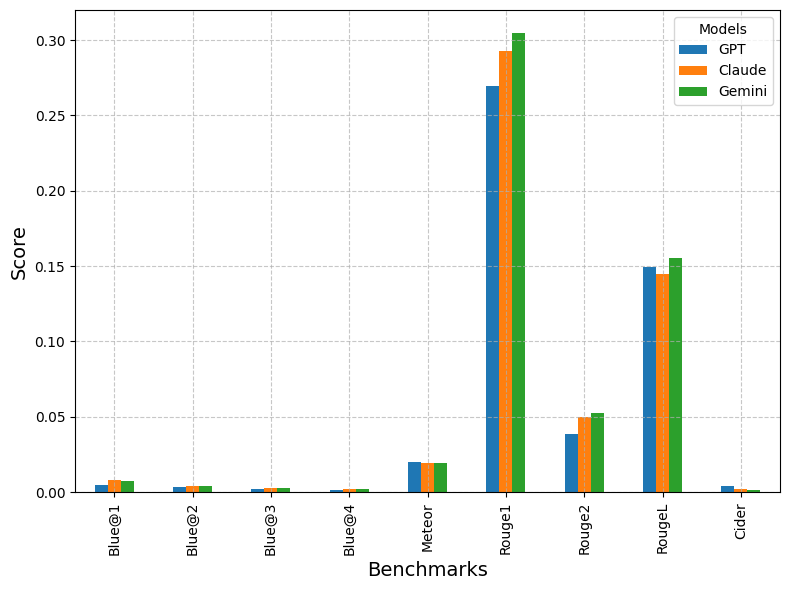

In [31]:
bar_graph(data=cw_df, title="Model Performance Across All Benchmarks For the Difficult Category CW", image_name="dc_cw_model_metrics_comparison_bar_charts")

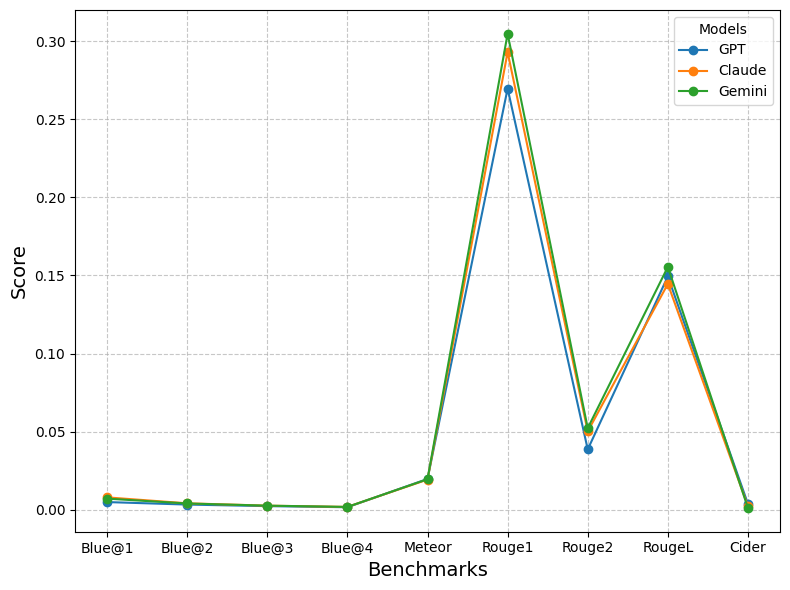

In [32]:
line_graph(data=cw_df, title="Model Performance Trends Across Benchmarks For the Difficult Category CW", image_name="dc_cw_model_metrics_comparison_line_charts")

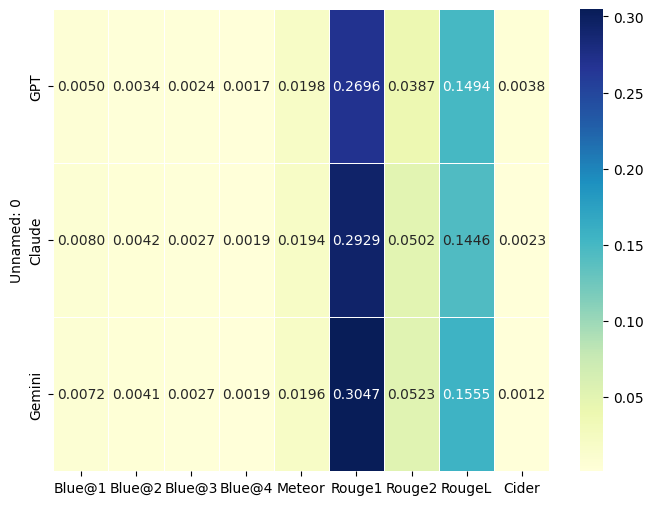

In [33]:
heatmap_graph(data=cw_df, title="Model Performance Heatma For the Difficult Category CW", image_name="dc_cw_model_metrics_comparison_heatmap")

In [130]:
had_df = draw_table(gpt_had_scores, claude_had_scores, gemini_had_scores)
# Display the table
print(had_df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0055  0.0035  0.0024  0.0017  0.0190  0.3031  0.0484  0.1702  0.0114
Claude  0.0094  0.0047  0.0030  0.0020  0.0197  0.2916  0.0522  0.1590  0.0787
Gemini  0.0070  0.0037  0.0024  0.0016  0.0168  0.3220  0.0531  0.1817  0.0000


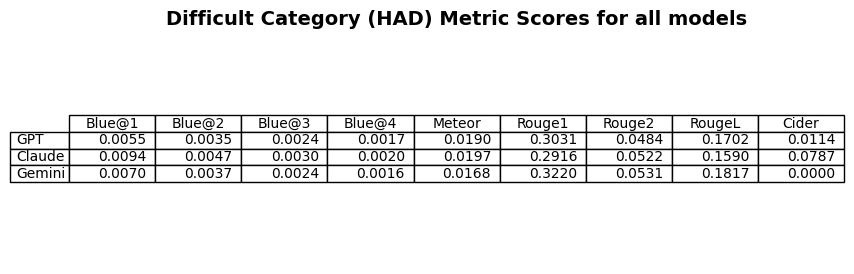

In [131]:
save_df_to_csv(had_df, 'dc_had_model_metrics_table', 'Difficult Category (HAD) Metric Scores for all models')

In [34]:
# Load the data from Excel file
had_df = pd.read_excel('dc_had_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
had_df = had_df.set_index(had_df.columns[0])

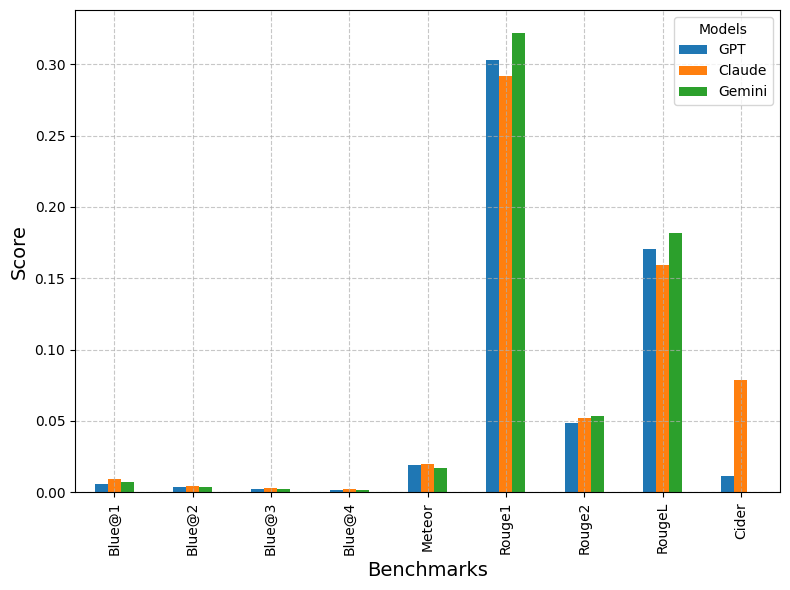

In [35]:
bar_graph(data=had_df, title="Model Performance Across All Benchmarks For the Difficult Category HAD", image_name="dc_had_model_metrics_comparison_bar_charts")

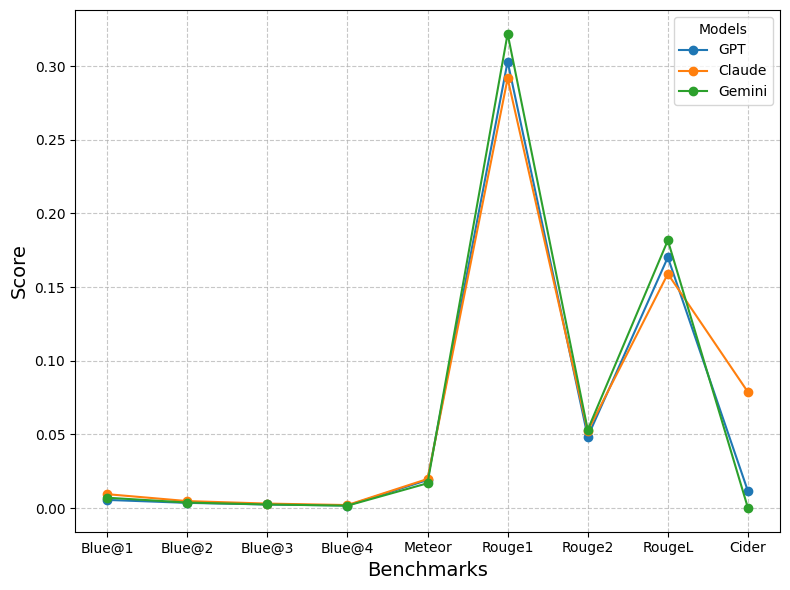

In [36]:
line_graph(data=had_df, title="Model Performance Trends Across Benchmarks For the Difficult Category HAD", image_name="dc_had_model_metrics_comparison_line_charts")

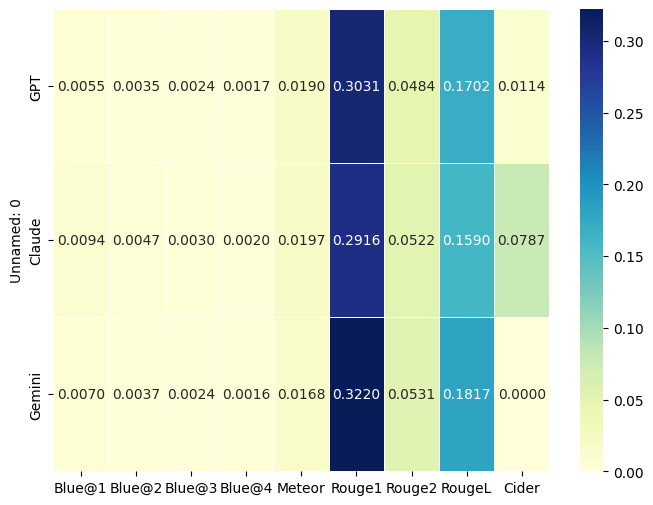

In [37]:
heatmap_graph(data=had_df, title="Model Performance Heatma For the Difficult Category HAD", image_name="dc_had_model_metrics_comparison_heatmap")

In [136]:
poo_df = draw_table(gpt_poo_scores, claude_poo_scores, gemini_poo_scores)
# Display the table
print(poo_df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0049  0.0035  0.0025  0.0017  0.0210  0.3774  0.0947  0.1877  0.0032
Claude  0.0095  0.0045  0.0028  0.0019  0.0188  0.3501  0.0715  0.1752  0.0000
Gemini  0.0059  0.0042  0.0030  0.0021  0.0249  0.4099  0.1265  0.1972  0.0000


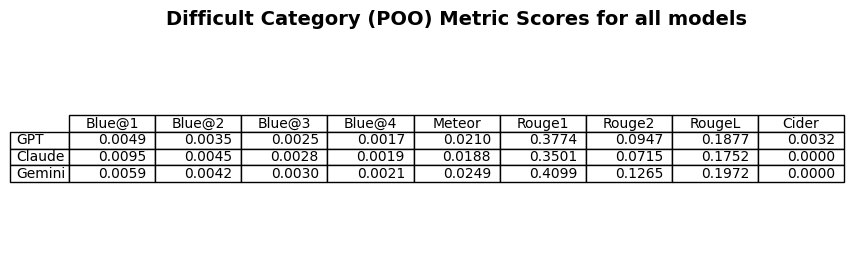

In [137]:
save_df_to_csv(poo_df, 'dc_poo_model_metrics_table', 'Difficult Category (POO) Metric Scores for all models')

In [38]:
# Load the data from Excel file
poo_df = pd.read_excel('dc_poo_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
poo_df = poo_df.set_index(poo_df.columns[0])

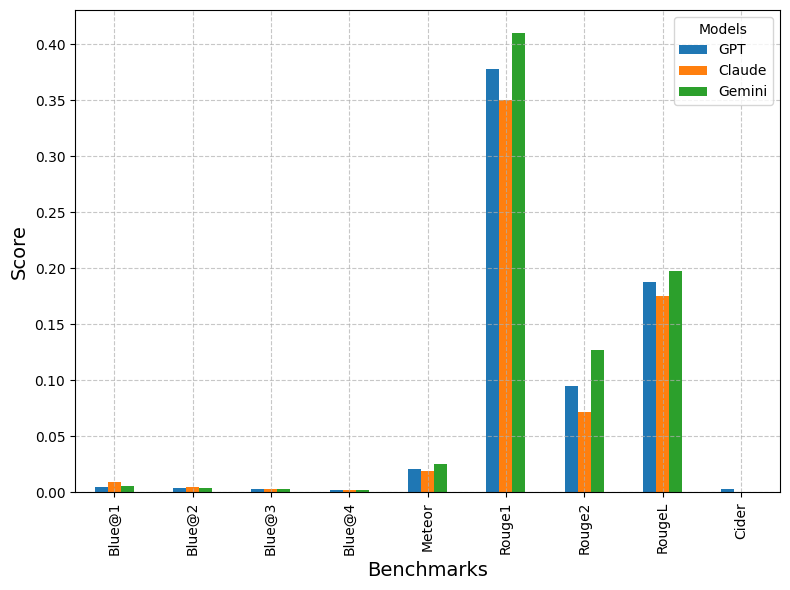

In [39]:
bar_graph(data=poo_df, title="Model Performance Across All Benchmarks For the Difficult Category POO", image_name="dc_poo_model_metrics_comparison_bar_charts")

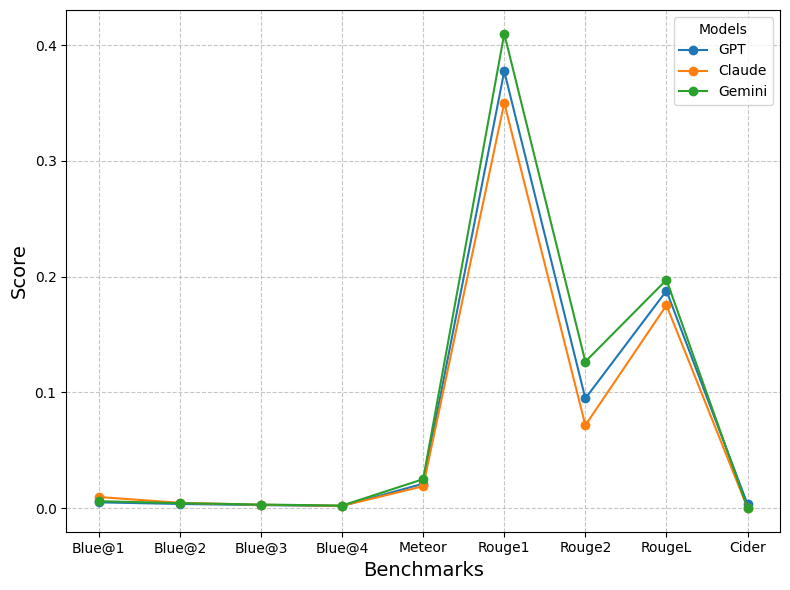

In [40]:
line_graph(data=poo_df, title="Model Performance Trends Across Benchmarks For the Difficult Category POO", image_name="dc_poo_model_metrics_comparison_line_charts")

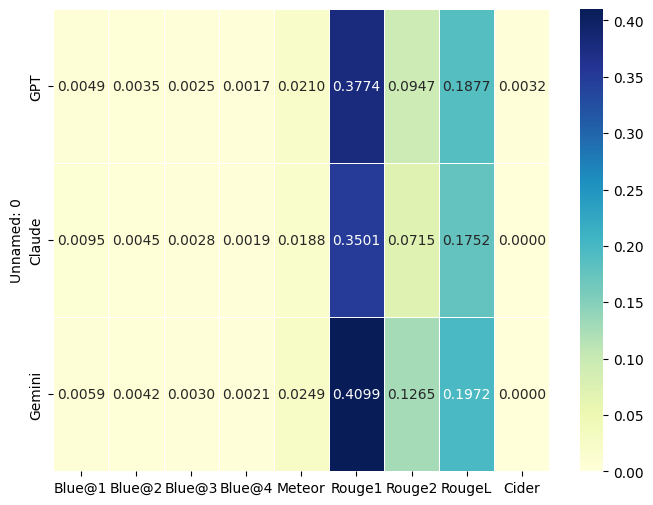

In [41]:
heatmap_graph(data=poo_df, title="Model Performance Heatma For the Difficult Category POO", image_name="dc_poo_model_metrics_comparison_heatmap")

In [142]:
stcb_df = draw_table(gpt_stcb_scores, claude_stcb_scores, gemini_stcb_scores)
# Display the table
print(stcb_df)

        Blue@1  Blue@2  Blue@3  Blue@4  Meteor  Rouge1  Rouge2  RougeL   Cider
GPT     0.0063  0.0045  0.0032  0.0023  0.0264  0.3119  0.0617  0.1959  0.0651
Claude  0.0084  0.0044  0.0029  0.0019  0.0197  0.3190  0.0699  0.1695  0.1401
Gemini  0.0063  0.0041  0.0028  0.0020  0.0219  0.3356  0.0884  0.1987  0.0003


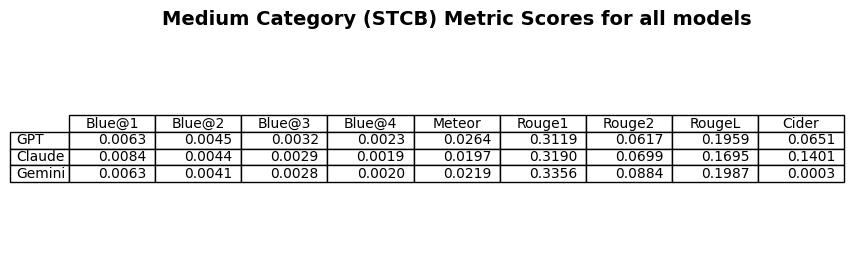

In [143]:
save_df_to_csv(stcb_df, 'dc_stcb_model_metrics_table', 'Medium Category (STCB) Metric Scores for all models')

In [42]:
# Load the data from Excel file
stcb_df = pd.read_excel('dc_stcb_model_metrics_table.xlsx')

# Setting the model names as the index for easier plotting
stcb_df = stcb_df.set_index(stcb_df.columns[0])

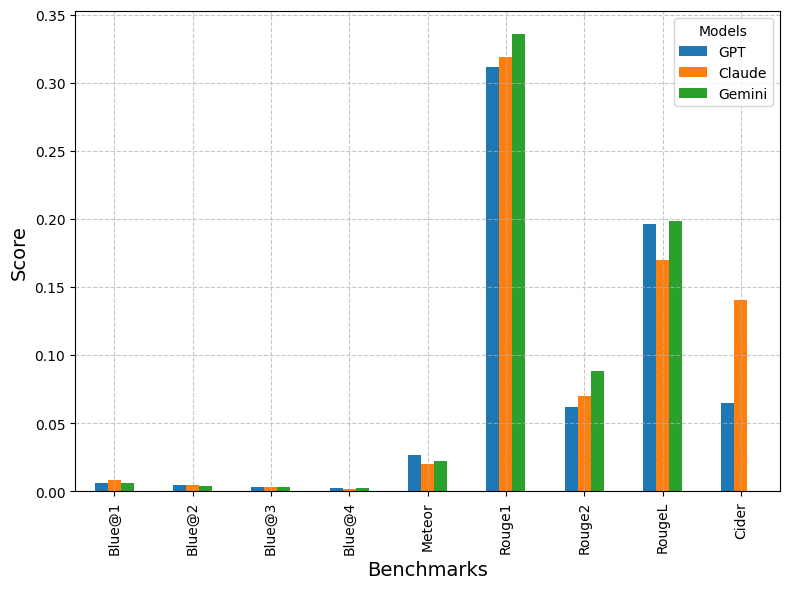

In [43]:
bar_graph(data=stcb_df, title="Model Performance Across All Benchmarks For the Difficult Category STCB", image_name="dc_stcb_model_metrics_comparison_bar_charts")

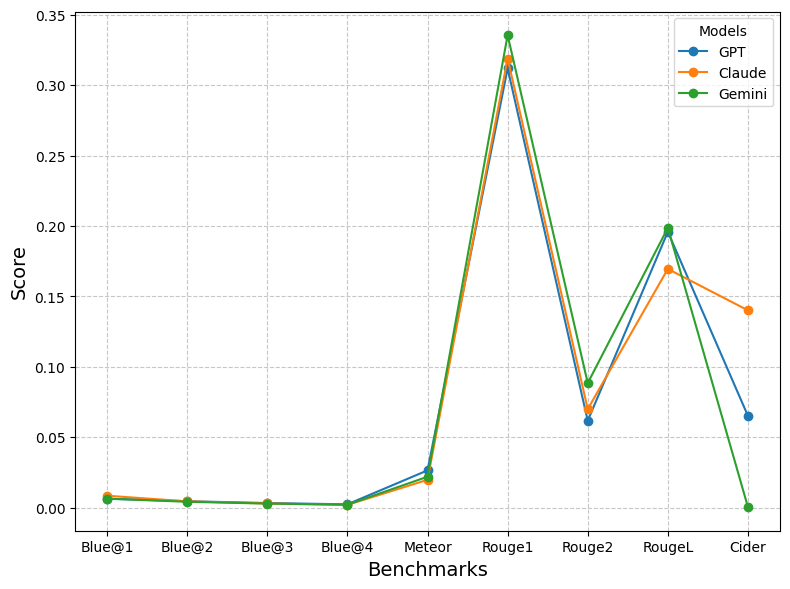

In [44]:
line_graph(data=stcb_df, title="Model Performance Trends Across Benchmarks For the Difficult Category STCB", image_name="dc_stcb_model_metrics_comparison_line_charts")

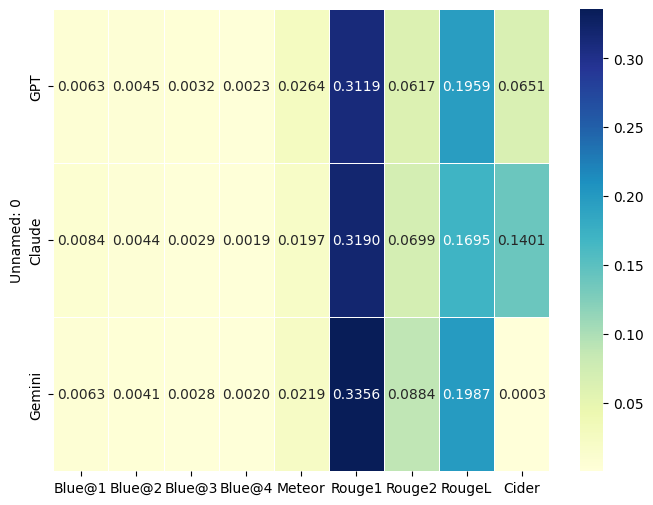

In [45]:
heatmap_graph(data=stcb_df, title="Model Performance Heatma For the Difficult Category STCB", image_name="dc_stcb_model_metrics_comparison_heatmap")

## 4- All Categories